In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data_complete_int_copy.csv')
df

,Bacteria,Year,Code_C,Country,Region,Aminoglycosides,Carbapenems,Ceftazidime,Fluoroquinolones,Piperacilina_taz,r_index,pca_1,multi_R_perc,multi_R_iso,multi._N_iso,DDD_sys_commun,per_cap_US.,GDP_total,GDP_._health,Out_pocket_exp,HDR,ctrl_corrup,GOV_effect,rule_law
0,Pseudomonas aeruginosa,2005,AT,Austria,Western,0.064935,0.103896,0.065789,0.142857,0.129870,16.365950,-1.150640,0.064935,5,77,12.8291,3709.0,38403.133880,9.63,19.183260,0.855,1.922060,1.684595,1.859191
1,Pseudomonas aeruginosa,2005,BG,Bulgaria,Eastern,0.529412,0.375000,0.454545,0.470588,0.500000,73.258622,4.765291,0.470588,16,34,15.5519,267.7,3899.907638,6.94,38.867414,0.750,0.057295,0.181857,-0.095587
2,Pseudomonas aeruginosa,2005,CY,Cyprus,Southern,0.108108,0.111111,0.243243,0.270270,0.270270,32.502433,0.527297,0.189189,1,8,27.1439,1366.0,24959.259170,5.44,49.832198,0.830,0.906869,1.157761,0.887087
3,Pseudomonas aeruginosa,2005,CZ,Czechia,Eastern,0.278261,0.311284,0.396887,0.453125,0.206226,52.378626,2.594104,0.307393,79,257,15.5538,852.7,13346.176390,6.38,11.092852,0.835,0.487308,0.925237,0.867528
4,Pseudomonas aeruginosa,2005,DE,Germany,Western,0.119658,0.247863,0.106195,0.226087,0.181034,28.014877,0.060663,0.162393,19,117,13.5382,3547.0,34507.368810,10.23,14.089450,0.900,1.885013,1.505681,1.663715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Pseudomonas aeruginosa,2018,PT,Portugal,Southern,0.119026,0.157040,0.186239,0.237319,0.218978,29.563498,0.221695,0.152527,169,1108,17.1966,1908.0,23461.571860,8.97,27.532080,0.850,0.849960,1.208909,1.140163
397,Pseudomonas aeruginosa,2018,RO,Romania,Eastern,0.506849,0.551282,0.467105,0.522581,0.492754,80.053170,5.471816,0.493506,76,154,24.9563,555.1,12408.596490,5.16,20.488046,0.816,-0.121651,-0.253442,0.325064
398,Pseudomonas aeruginosa,2018,SE,Sweden,Northern,0.009732,0.043689,0.060680,0.071078,0.077859,8.985867,-1.918051,0.019417,8,412,10.7826,5905.0,54589.060390,11.02,15.032604,0.937,2.139882,1.830975,1.894910
399,Pseudomonas aeruginosa,2018,SK,Slovakia,Eastern,0.374016,0.439516,0.320675,0.523810,0.368644,63.592039,3.760121,0.358871,89,248,20.2140,1186.0,19428.116210,6.74,18.713185,0.857,0.362984,0.707462,0.528572


In [2]:
X = df.iloc[:,15:24]  # features
y = df['r_index']/100.
X

,DDD_sys_commun,per_cap_US.,GDP_total,GDP_._health,Out_pocket_exp,HDR,ctrl_corrup,GOV_effect,rule_law
0,12.8291,3709.0,38403.133880,9.63,19.183260,0.855,1.922060,1.684595,1.859191
1,15.5519,267.7,3899.907638,6.94,38.867414,0.750,0.057295,0.181857,-0.095587
2,27.1439,1366.0,24959.259170,5.44,49.832198,0.830,0.906869,1.157761,0.887087
3,15.5538,852.7,13346.176390,6.38,11.092852,0.835,0.487308,0.925237,0.867528
4,13.5382,3547.0,34507.368810,10.23,14.089450,0.900,1.885013,1.505681,1.663715
...,...,...,...,...,...,...,...,...,...
396,17.1966,1908.0,23461.571860,8.97,27.532080,0.850,0.849960,1.208909,1.140163
397,24.9563,555.1,12408.596490,5.16,20.488046,0.816,-0.121651,-0.253442,0.325064
398,10.7826,5905.0,54589.060390,11.02,15.032604,0.937,2.139882,1.830975,1.894910
399,20.2140,1186.0,19428.116210,6.74,18.713185,0.857,0.362984,0.707462,0.528572


---
### Interpretación de los Coeficientes en un RL

Los valores de los coeficientes de un modelo de RL en conjunto con el uso de pruebas de hipótesis pueden ser utilizados para indicar la **naturaleza entre las variables independientes y la variable dependiente** y si estas relaciones son **estadísticamente significativas**.

Respecto a **los coeficientes** el **signo** y la **magnitud** indican diferentes cosas:

- ***Signo***: el sentido de la correlación entre cada variable independiente y la variable dependiente. Un coeficiente *positivo* indica que a medida que aumenta el valor de $x_i$, la media de $y$ también tiende a aumentar; un coeficiente *negativo* sugiere que a medida que aumenta el valor de $x_i$, el valor de $y$ tiende a disminuir.

- ***Magnitud***: indica cuánto cambia la media de $y$ dado un cambio de una unidad en la variable independiente $x_i$ mientras el resto de las variables se mantienen constantes. Esta propiedad de mantener constantes las otras variables es crucial ya que permite evaluar el efecto de cada variable de forma aislada sobre $y$.

Por otro lado existen dos pruebas de hipótesis utilizadas en RL. Por un lado, la **prueba F de Fisher** es utilizada para verificar la significancia de las variables independientes en una RL evaluandolas simultáneamente. Por el otro lado, la **prueba T** es utilizada para verificar la significancia una variable a la vez.

La prueba F de Fisher tiene las siguientes dos hipótesis:

- $H_0$: el modelo con solo el intercepto tiene el mismo ajuste a los datos que el modelo propuesto con todas las variables independientes.

- $H_A$: el modelo propuesto ajusta mejor que el modelo con solo el intercepto.

Si el p-value resultante de la prueba F es menor o igual que el nivel de significancia (e.g. $\textit{p}=0.005$), podemos aceptar $H_A$.

La prueba T es similar pero evaluando una variable independiente a la vez.

Analicemos el ejemplo utilizando ``statsmodels.api``

---
## Visualizando la relación  variables usando un Mapa de Calor

La **correlación** es cualquier relación estadística, ya sea causal o no, entre dos o más variables aleatorias que mide como se relacionan unas con las otras. En el sentido más amplio se reriere a cualquier asociación estadística, aunque comúnmente nos refierimos **al grado en que un par de variables están relacionadas linealmente** ($r\text{ o } \rho$).

Las correlaciones son útiles porque pueden indicar una **relación predictiva** que puede explotarse en la práctica. Usando este tipo de funciones podemos formar una **heuristica** para seleccionar las variables que utilizaremos en nuestra RL. Por ejemplo, una compañía eléctrica puede producir menos energía en un día templado en función de la correlación entre la demanda de electricidad y el clima.

Las 2 funciones de correlación más utilizadas son:

- **Coeficiente de Pearson**. Intenta establecer una línea con el mejor ajuste para los datos de dos variables a traves de los valores esperados. El valor del coeficiente resultante indica qué tan lejos está el conjunto de datos real de los valores esperados.
\begin{align}
\rho_{X,Y} &= corr(X,Y)= \frac{cov(X,Y)}{\sigma_X\cdot\sigma_Y}=\frac{\text{E}[(X - \mu_X) \cdot (Y - \mu_y)]}{\sigma_X\cdot\sigma_Y} \\
corr(X,Y) &\in [-1,1]
\end{align}


<img src="https://docs.google.com/uc?export=download&id=111DG1bi5ewOtSIuOlB0pRcFj21yeFG5x" width="800" align="middle">


- **Coeficiente de Spearman**. Es una medida no-paramétrica de correlación de rango (dependencia estadística entre los rangos de dos variables). Evalúa qué tan bien la relación entre dos variables se puede describir utilizando una función monotónica, sea creciente o decreciente (indistintamente si esta función es lineal o no). Los valores que toma este coeficiente se interpretan de forma similar al coeficiente de Pearson.

\begin{align}
\rho_{rg_X,rg_Y} &= r_s(rg_X,rg_Y)=\frac{cov(rg_X,rg_Y)}{\sigma_{rg_X}\cdot\sigma_{rg_Y}}, \\
r_s &\in [-1,1]
\end{align}

tal que $rg_{X_i},\ rg_{Y_i}$ representan los valores de las variables $X_i$ y $Y_i$, respectivamente, en rangos.

<img src="https://docs.google.com/uc?export=download&id=1WXANQb-rIdPO0bISEOCsBGf1OLfIZRvt" width="800" align="middle">




#### Ejemplo:

Usemos estas 2 medidas construiremos una matriz de correlaciones.
Para esto necesitaremos las librerias Seaborn, Matplotlib, Sklearn, Pandas y Numpy.

1. Analizaremos cuales son las correlaciones observadas y sus signos.
2. Utilizaremos un umbral de correlación para determinar las variables independientes que entrarán en nuestro modelo final.

Usando la matriz de correlación determinaremos que variables usaremos para predecir ``PE``. En este caso, requeriremos que la relación sea $|r|> 0.5$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


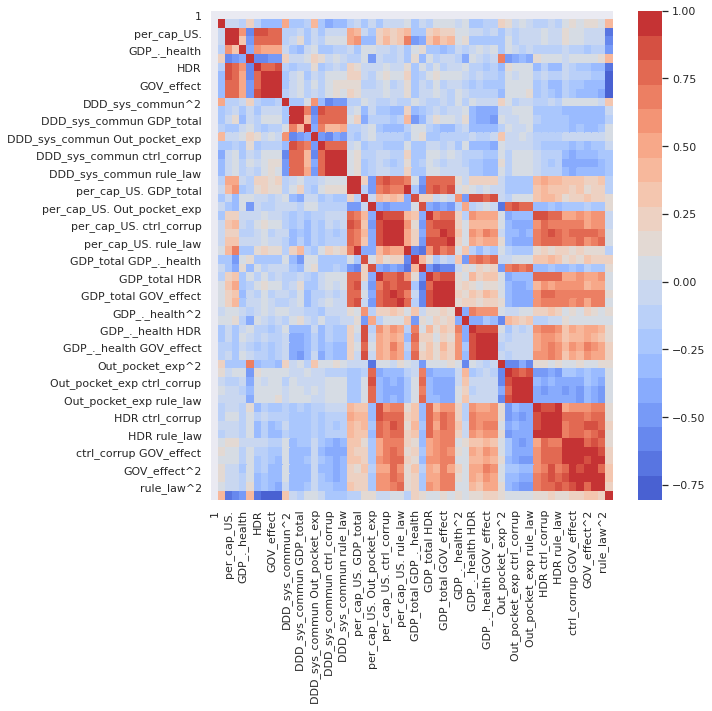

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

poly_grade = 2

std_scl = StandardScaler()
poly = PolynomialFeatures(poly_grade)

X = df.iloc[:,15:24]
y = df['r_index']/100.

# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.2, 
#                                                     random_state=1)

#Standardize X_train into X_train_scl
X_train_scl = std_scl.fit_transform(X) #Standardize and assign it to a variable

#Construct a DataFrame with column names
X_train_scl_df = pd.DataFrame(X_train_scl, 
                              index=X.index, 
                              columns=X.columns)

#Create PolynomialFeatures -> get their names
p_model     = poly.fit(X_train_scl_df)
poly_names  = p_model.get_feature_names(X_train_scl_df.columns)

#Transform X_train_scl into X_train_poly where polynomial features are stored
X_train_poly    = poly.fit_transform(X_train_scl_df)
X_train_poly_df = pd.DataFrame(X_train_poly, 
                              index=X.index, 
                              columns= poly_names)

#Create the full Train_df which is the matrix composed by Xy
all_names = np.concatenate((X_train_poly_df.columns, 'multi_R_perc'), axis=None)
Train_ndarray = np.hstack([X_train_poly_df, y[:, np.newaxis]])

Train_df = pd.DataFrame(Train_ndarray, 
                              index=X.index, 
                              columns = all_names)

# Compute the correlation matrix
corr_mtx = Train_df.corr()
# corr_mtx = Train_df.corr('spearman')

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr_mtx, dtype=np.bool))

f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corr_mtx, 
            # mask=mask, 
            cmap=sns.color_palette("coolwarm", 20))
# sns.heatmap(corr_mtx,ax=ax, cmap ="YlGnBu", linewidths = 0.1,)


In [ ]:
#corr_mtx

In [ ]:
print(X.shape)
print(y.shape)
print(X_train_poly.shape)

(401, 9)
(401,)
(401, 55)


In [ ]:
Train_df.shape

(401, 56)

In [ ]:
Train_df.head()

,1,DDD_sys_commun,per_cap_US.,GDP_total,GDP_._health,Out_pocket_exp,HDR,ctrl_corrup,GOV_effect,rule_law,DDD_sys_commun^2,DDD_sys_commun per_cap_US.,DDD_sys_commun GDP_total,DDD_sys_commun GDP_._health,DDD_sys_commun Out_pocket_exp,DDD_sys_commun HDR,DDD_sys_commun ctrl_corrup,DDD_sys_commun GOV_effect,DDD_sys_commun rule_law,per_cap_US.^2,per_cap_US. GDP_total,per_cap_US. GDP_._health,per_cap_US. Out_pocket_exp,per_cap_US. HDR,per_cap_US. ctrl_corrup,per_cap_US. GOV_effect,per_cap_US. rule_law,GDP_total^2,GDP_total GDP_._health,GDP_total Out_pocket_exp,GDP_total HDR,GDP_total ctrl_corrup,GDP_total GOV_effect,GDP_total rule_law,GDP_._health^2,GDP_._health Out_pocket_exp,GDP_._health HDR,GDP_._health ctrl_corrup,GDP_._health GOV_effect,GDP_._health rule_law,Out_pocket_exp^2,Out_pocket_exp HDR,Out_pocket_exp ctrl_corrup,Out_pocket_exp GOV_effect,Out_pocket_exp rule_law,HDR^2,HDR ctrl_corrup,HDR GOV_effect,HDR rule_law,ctrl_corrup^2,ctrl_corrup GOV_effect,ctrl_corrup rule_law,GOV_effect^2,GOV_effect rule_law,rule_law^2,multi_R_perc
0,1.0,-0.895821,0.319894,0.125417,0.832386,-0.218324,-0.395114,1.016323,0.884154,1.085846,0.802495,-0.286567,-0.112352,-0.745669,0.195579,0.353952,-0.910443,-0.792044,-0.972723,0.102332,0.040120,0.266275,-0.069840,-0.126395,0.325115,0.282835,0.347355,0.015730,0.104396,-0.027382,-0.049554,0.127465,0.110888,0.136184,0.692867,-0.181729,-0.328888,0.845973,0.735958,0.903843,0.047665,0.086263,-0.221887,-0.193032,-0.237066,0.156115,-0.401564,-0.349342,-0.429033,1.032912,0.898586,1.103570,0.781729,0.960055,1.179061,0.163659
1,1.0,-0.397984,-1.333407,-1.344347,-0.739957,1.744645,-2.866707,-1.290344,-1.663321,-2.078085,0.158392,0.530675,0.535029,0.294491,-0.694342,1.140905,0.513537,0.661976,0.827045,1.777975,1.792562,0.986664,-2.326323,3.822488,1.720555,2.217884,2.770933,1.807268,0.994759,-2.345409,3.853849,1.734671,2.236080,2.793666,0.547536,-1.290963,2.121240,0.954799,1.230786,1.537693,3.043788,-5.001388,-2.251194,-2.901905,-3.625521,8.218010,3.699040,4.768253,5.957260,1.664989,2.146257,2.681445,2.766636,3.456521,4.318435,0.732586
2,1.0,1.721496,-0.805752,-0.447263,-1.616728,2.838090,-0.983589,-0.239443,-0.008946,-0.487565,2.963548,-1.387098,-0.769962,-2.783191,4.885760,-1.693244,-0.412201,-0.015400,-0.839341,0.649236,0.360383,1.302682,-2.286796,0.792529,0.192932,0.007208,0.392856,0.200044,0.723103,-1.269373,0.439923,0.107094,0.004001,0.218070,2.613810,-4.588420,1.590196,0.387115,0.014463,0.788260,8.054755,-2.791514,-0.679562,-0.025388,-1.383753,0.967447,0.235514,0.008799,0.479563,0.057333,0.002142,0.116744,0.000080,0.004362,0.237719,0.325024
3,1.0,-0.397637,-1.052356,-0.941956,-1.067285,-1.025126,-0.865894,-0.758430,-0.403127,-0.519223,0.158115,0.418456,0.374557,0.424392,0.407628,0.344312,0.301580,0.160298,0.206462,1.107453,0.991273,1.123164,1.078797,0.911229,0.798138,0.424233,0.546408,0.887281,1.005335,0.965623,0.815634,0.714407,0.379727,0.489085,1.139097,1.094101,0.924156,0.809461,0.430251,0.554159,1.050883,0.887650,0.777486,0.413255,0.532269,0.749772,0.656720,0.349065,0.449592,0.575216,0.305743,0.393794,0.162511,0.209313,0.269593,0.523786
4,1.0,-0.766169,0.242064,-0.040534,1.183095,-0.726295,0.664140,0.970496,0.580856,0.769455,0.587015,-0.185462,0.031056,-0.906451,0.556465,-0.508843,-0.743564,-0.445034,-0.589533,0.058595,-0.009812,0.286385,-0.175810,0.160764,0.234922,0.140604,0.186258,0.001643,-0.047955,0.029440,-0.026920,-0.039338,-0.023544,-0.031189,1.399713,-0.859276,0.785740,1.148189,0.687207,0.910339,0.527505,-0.482361,-0.704867,-0.421873,-0.558852,0.441082,0.644545,0.385769,0.511026,0.941863,0.563718,0.746754,0.337393,0.446943,0.592062,0.280149


In [ ]:
delta = 0.1
main_variables=corr_mtx.iloc[1:-1,-1].abs() > delta
#main_variables

In [ ]:
#main_variables[main_variables].index

In [ ]:
print(main_variables[main_variables].index.shape)
print(len(main_variables[main_variables].index))

(38,)
38


In [ ]:
# Following we create a dataframe with the selected features

In [ ]:
main_vars=main_variables.to_frame()

In [ ]:
# main_vars contains all the variables not yet filtered
#main_vars

In [ ]:
filtered_vars=list(main_vars[main_variables].index)

In [ ]:
len(filtered_vars)

38

In [ ]:
X_R = Train_df[filtered_vars]
X_R

,DDD_sys_commun,per_cap_US.,GDP_total,GDP_._health,Out_pocket_exp,HDR,ctrl_corrup,GOV_effect,rule_law,DDD_sys_commun^2,DDD_sys_commun GDP_total,DDD_sys_commun ctrl_corrup,DDD_sys_commun GOV_effect,DDD_sys_commun rule_law,per_cap_US.^2,per_cap_US. GDP_total,per_cap_US. GDP_._health,per_cap_US. Out_pocket_exp,GDP_total^2,GDP_total GDP_._health,GDP_total Out_pocket_exp,GDP_total GOV_effect,GDP_._health^2,GDP_._health HDR,GDP_._health ctrl_corrup,GDP_._health GOV_effect,GDP_._health rule_law,Out_pocket_exp^2,HDR^2,HDR ctrl_corrup,HDR GOV_effect,HDR rule_law,ctrl_corrup^2,ctrl_corrup GOV_effect,ctrl_corrup rule_law,GOV_effect^2,GOV_effect rule_law,rule_law^2
0,-0.895821,0.319894,0.125417,0.832386,-0.218324,-0.395114,1.016323,0.884154,1.085846,0.802495,-0.112352,-0.910443,-0.792044,-0.972723,0.102332,0.040120,0.266275,-0.069840,0.015730,0.104396,-0.027382,0.110888,0.692867,-0.328888,0.845973,0.735958,0.903843,0.047665,0.156115,-0.401564,-0.349342,-0.429033,1.032912,0.898586,1.103570,0.781729,0.960055,1.179061
1,-0.397984,-1.333407,-1.344347,-0.739957,1.744645,-2.866707,-1.290344,-1.663321,-2.078085,0.158392,0.535029,0.513537,0.661976,0.827045,1.777975,1.792562,0.986664,-2.326323,1.807268,0.994759,-2.345409,2.236080,0.547536,2.121240,0.954799,1.230786,1.537693,3.043788,8.218010,3.699040,4.768253,5.957260,1.664989,2.146257,2.681445,2.766636,3.456521,4.318435
2,1.721496,-0.805752,-0.447263,-1.616728,2.838090,-0.983589,-0.239443,-0.008946,-0.487565,2.963548,-0.769962,-0.412201,-0.015400,-0.839341,0.649236,0.360383,1.302682,-2.286796,0.200044,0.723103,-1.269373,0.004001,2.613810,1.590196,0.387115,0.014463,0.788260,8.054755,0.967447,0.235514,0.008799,0.479563,0.057333,0.002142,0.116744,0.000080,0.004362,0.237719
3,-0.397637,-1.052356,-0.941956,-1.067285,-1.025126,-0.865894,-0.758430,-0.403127,-0.519223,0.158115,0.374557,0.301580,0.160298,0.206462,1.107453,0.991273,1.123164,1.078797,0.887281,1.005335,0.965623,0.379727,1.139097,0.924156,0.809461,0.430251,0.554159,1.050883,0.749772,0.656720,0.349065,0.449592,0.575216,0.305743,0.393794,0.162511,0.209313,0.269593
4,-0.766169,0.242064,-0.040534,1.183095,-0.726295,0.664140,0.970496,0.580856,0.769455,0.587015,0.031056,-0.743564,-0.445034,-0.589533,0.058595,-0.009812,0.286385,-0.175810,0.001643,-0.047955,0.029440,-0.023544,1.399713,0.785740,1.148189,0.687207,0.910339,0.527505,0.441082,0.644545,0.385769,0.511026,0.941863,0.563718,0.746754,0.337393,0.446943,0.592062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,-0.097268,-0.545359,-0.511061,0.446607,0.614248,-0.512809,-0.309837,0.077761,-0.077946,0.009461,0.049710,0.030137,-0.007564,0.007582,0.297417,0.278712,-0.243561,-0.334986,0.261184,-0.228243,-0.313919,-0.039741,0.199458,-0.229024,-0.138375,0.034729,-0.034811,0.377301,0.262973,0.158887,-0.039877,0.039971,0.095999,-0.024093,0.024151,0.006047,-0.006061,0.006076
397,1.321515,-1.195332,-0.981895,-1.780392,-0.088206,-1.313135,-1.511697,-2.401250,-1.397234,1.746402,-1.297589,-1.997730,-3.173288,-1.846467,1.428818,1.173690,2.128160,0.105435,0.964117,1.748158,0.086609,2.357775,3.169796,2.337895,2.691413,4.275167,2.487625,0.007780,1.724322,1.985061,3.153164,1.834757,2.285226,3.629961,2.112194,5.766002,3.355109,1.952264
398,-1.270003,1.374916,0.814904,1.644861,-0.632241,1.535082,1.285763,1.132302,1.143659,1.612907,-1.034930,-1.632923,-1.438027,-1.452450,1.890395,1.120424,2.261546,-0.869278,0.664068,1.340403,-0.515215,0.922717,2.705567,2.524996,2.114901,1.862479,1.881160,0.399728,2.356477,1.973751,1.738176,1.755610,1.653186,1.455872,1.470474,1.282108,1.294967,1.307956
399,0.454433,-0.892229,-0.682878,-0.856860,-0.265201,-0.348036,-0.912215,-0.772304,-1.067844,0.206510,-0.310323,-0.414541,-0.350961,-0.485264,0.796073,0.609284,0.764515,0.236620,0.466322,0.585131,0.181100,0.527390,0.734209,0.298218,0.781640,0.661757,0.914992,0.070332,0.121129,0.317484,0.268790,0.371648,0.832135,0.704507,0.974103,

In [ ]:
# Just execute once, otherwise filtered_vars will contain the variable 'Intercept' twice
filtered_vars.insert(0,'Intercept')
print(type(filtered_vars))
print(len(filtered_vars))

<class 'list'>
39


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import statsmodels.api as sm

std_scl = StandardScaler()

y = df['r_index']/100.

X_train, X_test, y_train, y_test = train_test_split(X_R, y, 
                                                    test_size=0.2, 
                                                    random_state=100)

X_train_scl = std_scl.fit_transform(X_train) #Standardize and assign it to a variable
X_train_sm = sm.add_constant(X_train_scl)
model_sm = sm.OLS(y_train, X_train_sm)

results = model_sm.fit()
results.params

print(results.summary(filtered_vars))

                                                                                                                                                                                                                                                                                                                                                                                                                             OLS Regression Results                                                                                                                                                                                                                                                                                                                                                                                                                             
Dep. Variable:     ['Intercept', 'DDD_sys_commun', 'per_cap_US.', 'GDP_total', 'GDP_._health', 'Out_pocket_exp', 'HDR', 'ctrl_corrup', 'GOV_effect', 'r

R2:  0.6292093759503333
RMSE:  0.1074455619219126


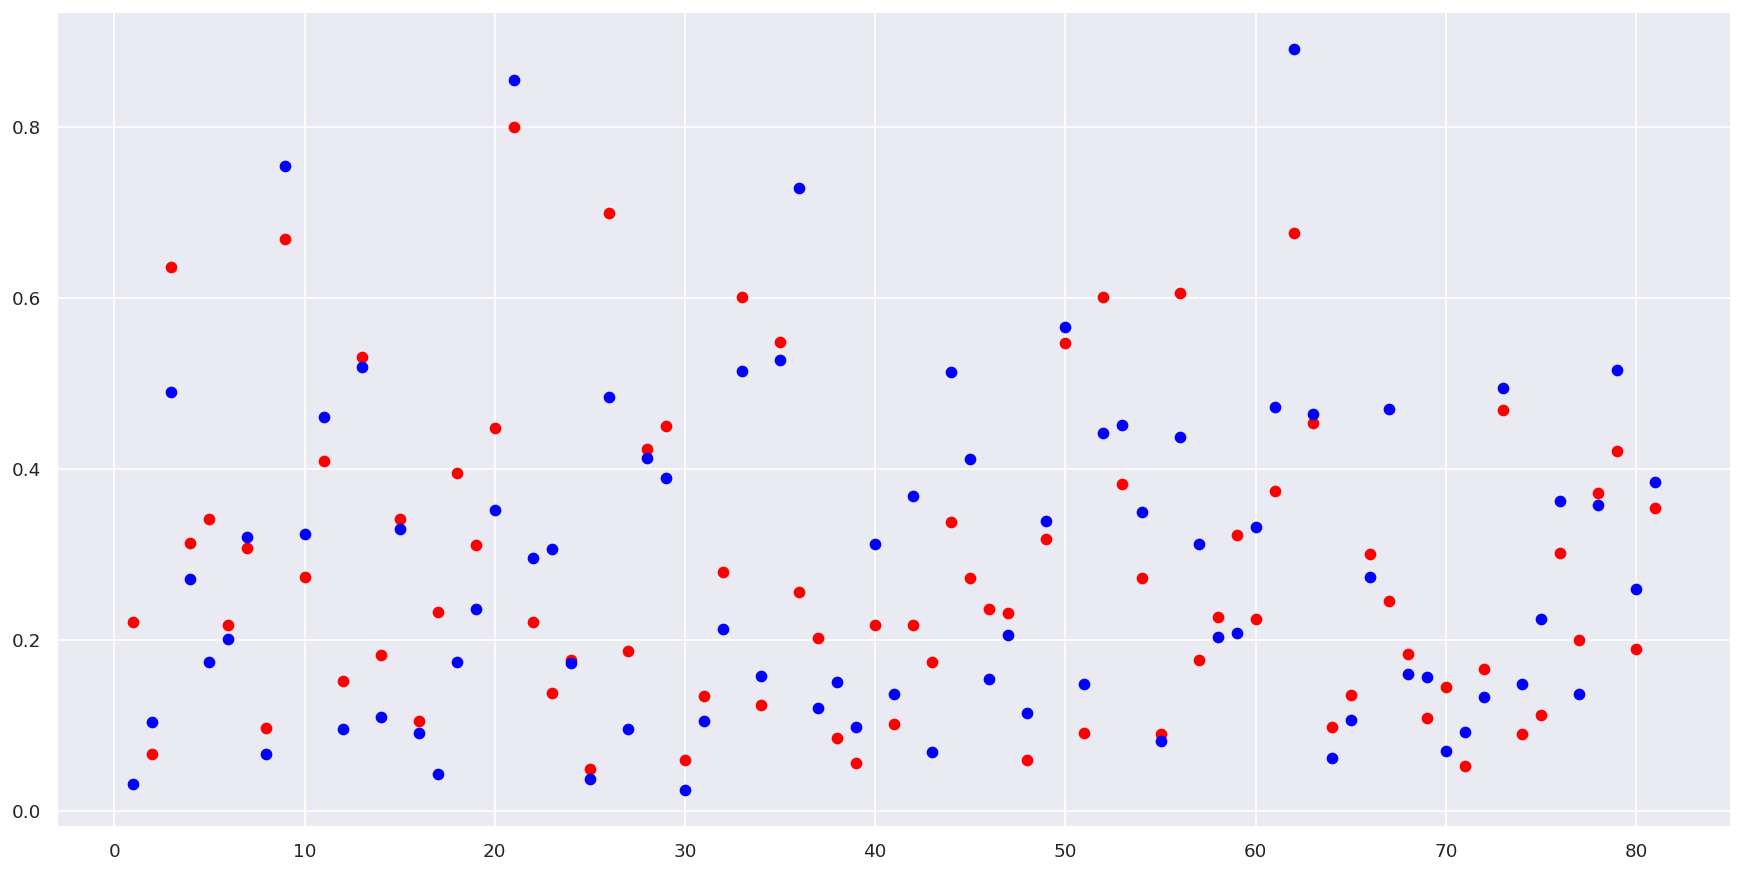

In [ ]:
# R^2 on test data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import numpy as np

#here the degree of the polynomialFeatures must be one, 
#since the filtered variables have been selected already
model_pl = make_pipeline(StandardScaler(),
                         PolynomialFeatures(1),
                          LinearRegression())

#X = ccpp_df.iloc[:,15:24]
#y = ccpp_df['multi_R_perc']

X_train, X_test, y_train, y_test = train_test_split(X_R, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

model_pl.fit(X_train, y_train)

# print(model_pl.steps)
# print(model_pl.named_steps['linearregression'].coef_)
# print(model_pl.named_steps['linearregression'].intercept_)

y_hat = model_pl.predict(X_test)
# y_hat = model_pl.predict(X_train)

x_plt = np.linspace(1, y_hat.shape[0], y_hat.shape[0])
#fig, ax= plt.subplots(figsize=(18, 9),dpi=120)
plt.figure(figsize=(18, 9), dpi=120)
plt.scatter(x_plt, y_test, color = 'red')
plt.scatter(x_plt, y_hat, color = 'blue')

print('R2: ',r2_score(y_test,y_hat))
print('RMSE: ',mean_squared_error(y_test,y_hat, squared=False))

In [ ]:
# threshold = 0.5
# main_variables=corr_mtx.iloc[1:-1,-1].abs() > threshold
# main_vars=main_variables.to_frame()
# filter_vars=list(main_vars[main_variables].index)
# XR = Train_df[filter_vars]

--- 
## Prediccion:

Predecir ``X_test`` con las variables seleccionadas de acuerdo al umbral especificado.

Medir el error utilizando las métricas de error $R^2$ y MSE. Imprima ambos.



---
# 2.4. Evaluación del Error: $R^2$ y Error Cuadrático Promedio (MSE).

- **Coeficiente de Determinación** ($R^2$ or $r^2$): Es la proporción de la varianza en la variable dependiente ($y$) que es predecible/que se puede explicar a partir de las variables independientes ($X$). 

  Hay varias definiciones del coeficiente de determinación. En el caso RLS, $r^2$ es simplemente el cuadrado del coeficiente de correlación i.e. $(\rho_{X,Y})^2$. En el caso de RLM se llama coeficiente de correlaciones multiples. En ambos casos su valor es $R^2\in[0,1]$.

  $$
  R^2 \equiv 1 - \frac{\sum_i e_i^2}{\sum_i (y_i-\bar{y})^2},
  $$

  tal que $e_i=y_i-\hat{y}_i$ son los residuos, y $\bar{y}$ es la media de la variable dependiente.

- **Error Cuadrático Promedio** (MSE): El error cuadrático promedio indica que tan cerca está una línea de regresión de un conjunto de puntos. Lo hace tomando los residuos y elevandolos al cuadrado. Se eleva al cuadrado por dos razones, por una parte es necesario para eliminar cualquier signo negativo, por la otra, le da más peso a las diferencias más grandes. En este sentido, MSE es una medida de la variabilidad explicada por el modelo. Esta medida toma valores entre $0\geq MSE \geq \infty$, de tal suerte que entre más pequeño sea el valor de MSE, mejor será el ajuste entre $y_i$ y $\hat{y}_i$.

  $$
  MSE(\mathbf{e})  = \frac{1}{N} \sum_{i=1}^N (e_i)^2.
  $$

  Sin embargo, para que el resultado de esta medida sea más intuitivo (el error en las mismas unidades que la variable dependiente), se utiliza la ráiz cuadrada de MSE (RMSE).

  $$
  RMSE(\mathbf{e})  = \sqrt{\frac{1}{N} \sum_{i=1}^N (e_i)^2},
  $$


### Ejercicio:

Deseamos construir una RL  con ``Scikit Learn`` para predecir la Energía Generada (PE) del ejemplo del generador de ciclo combinado. 

El modelo que deben utilizar debe incluir las siguientes caracteristicas:

1. $X$ tiene que estar estandarizado
2. Debemos usar funciones base para generar un polinómio de orden 5
3. El conjunto de datos se debe dividir en: ``X_train, y_train`` ($70 \%$) y ``X_test, y_test`` ($30 \%$).
4. Se debe predecir sobre ``X_test`` estandarizado.
5. Calcule el error de la RLM usando $R^2$ y RMSE. Imprima ambos.

Necesitaremos las librerias de ``sklearn``:

1. ``linear_model.LinearRegression``
2. ``preprocessing.StandardScaler, preprocessing.PolynomialFeatures``
3. ``model_selection.train_test_split``
4. ``metrics.r2_score, metrics.mean_squared_error``
5. ``pipeline import make_pipeline``

¿Qué podemos concluir de los resultados? 
¿Qué tan bueno es nuestro ajuste?

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd

from google.colab import data_table

### LOAD DATA 

df = pd.read_csv('data_complete_int_copy.csv')

X = df.iloc[:,15:24]  # features
y = df['r_index']/100.


### CREATE PIPELINES
no_poly = 3

std_sclr = StandardScaler()
sclr_01 = MinMaxScaler()

lr_m  = LinearRegression()
knn_m = KNeighborsRegressor(n_neighbors=5)
dt_m  = DecisionTreeRegressor(criterion='mse',
                             max_depth=5,
                             min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                             random_state=0)

polyFt_m = PolynomialFeatures(no_poly)

#--------
### SPLIT DATA INTO TRAIN AND TEST DATASETS

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

---
### Selección de Variables con ``SkLearn``

#### **1.1. Filtros**

- Previos al entrenamiento del modelo

##### **1.1.1. Filtro de poca Varianza**

- Se utiliza exclusivamente sobre la matriz de características ``X``.

En nuestro ejercicio de los regresores, este filtro eliminará las variables con varianza menor a 0.01

In [39]:
from sklearn.feature_selection import VarianceThreshold

delta = 0.05
 
X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)
 
sel = VarianceThreshold(threshold=( delta ))
X_train_sel = sel.fit_transform(X_train_tmp)
 
#Obtain a mask of True and False values: 
#true -> feat is selected
#false -> otherwise
ft_sel_msk = sel.get_support()
 
ft_names = polyFt_m.get_feature_names(X.columns)
ft_names = np.asarray(ft_names)
# print('Antes:', ft_names)
# print('Despues:', ft_names[ft_msk])
 
X_train_sel = pd.DataFrame(X_train_sel,
                   columns=ft_names[ft_sel_msk])

In [40]:
print(X_train_sel.shape[1])

42


In [41]:
model_pl = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         lr_m)

model_knn = make_pipeline(sclr_01,
                          polyFt_m,
                          sel,
                          knn_m)

model_dt = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         dt_m)

In [42]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

#--------
### EVALUATE CV TRAINING ERROR

scoring = {'R2': make_scorer(r2_score), 
           'RMSE': make_scorer(mean_squared_error)}

lrm_scr = cross_validate(model_pl, X_train, y_train, 
                          scoring = scoring, cv=10)
knn_scr = cross_validate(model_knn, X_train, y_train, 
                          scoring = scoring, cv=10)
dt_scr = cross_validate(model_dt, X_train, y_train, 
                         scoring = scoring, cv=10)

print('TRAIN CV ERROR----')

print('LRM_R2: ', np.mean(lrm_scr.get('test_R2')))
print('KNN_R2: ', np.mean(knn_scr.get('test_R2')))
print('DT_R2: ', np.mean(dt_scr.get('test_R2')))
print()
print('LRM_RMSE: ', np.mean(lrm_scr.get('test_RMSE')))
print('KNN_RMSE: ', np.mean(knn_scr.get('test_RMSE')))
print('DT_RMSE: ', np.mean(dt_scr.get('test_RMSE')))

TRAIN CV ERROR----
LRM_R2:  0.6425247198361342
KNN_R2:  0.7596491757041615
DT_R2:  0.6111843580060806

LRM_RMSE:  0.011334520684772198
KNN_RMSE:  0.007682336198883938
DT_RMSE:  0.01236699346785668


In [43]:
model_pl.fit(X_train, y_train)
model_knn.fit(X_train, y_train)
model_dt.fit(X_train, y_train);

# #--------
# ### PREDICT TEST DATA 

y_hat = model_pl.predict(X_test)
y_hatknn = model_knn.predict(X_test)
y_hatdt = model_dt.predict(X_test)

# #--------
# ### PRINT SCORES

print('TEST ERROR----')

print('LR R2 : ',r2_score(y_test,y_hat))
print('KNN R2: ',r2_score(y_test,y_hatknn))
print('DT R2 : ',r2_score(y_test,y_hatdt))
print()
print('LR RMSE : ',mean_squared_error(y_test,y_hat, squared=False))
print('KNN RMSE: ',mean_squared_error(y_test,y_hatknn, squared=False))
print('DT RMSE : ',mean_squared_error(y_test,y_hatdt, squared=False))

TEST ERROR----
LR R2 :  0.6936496011438185
KNN R2:  0.8036450519666455
DT R2 :  0.6968233857362

LR RMSE :  0.09766373621995761
KNN RMSE:  0.07818888759950442
DT RMSE :  0.09715652184626312


##### **1.1.2. Selección de las K mejores variables**

- Selecciona las mejores características basadas en pruebas estadísticas univariadas.
- Se utiliza exclusivamente sobre la matriz de características ``X``.
- Utiliza una función de ``scoring`` para determinar las K mejores variables

En nuestro ejercicio de los regresores, este filtro seleccionará las 50 mejores variables de acuerdo a la prueba F de Fisher.

In [60]:
import warnings
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
#f_regression F de Fisher and SelectKBest
warnings.filterwarnings("ignore")


### CREATE PIPELINES
no_poly = 5

std_sclr = StandardScaler()
sclr_01 = MinMaxScaler()

lr_m  = LinearRegression()
knn_m = KNeighborsRegressor(n_neighbors=5)
dt_m  = DecisionTreeRegressor(criterion='mse',
                             max_depth=5,
                             min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                             random_state=2)

polyFt_m = PolynomialFeatures(no_poly)





no_fts = 60

X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)

sel = SelectKBest(f_regression, k=no_fts)
# sel = SelectKBest(mutual_info_regression, k=no_fts)
X_train_sel = sel.fit_transform(X_train_tmp, y_train)

# f_res, pval = f_regression(X_train_tmp, y_train)
# print(pval<0.001)

#Obtain a mask of True and False values: 
#true -> feat is selected
#false -> otherwise
ft_sel_msk = sel.get_support()

ft_names = polyFt_m.get_feature_names(X.columns)
ft_names = np.asarray(ft_names)

X_train_sel = pd.DataFrame(X_train_sel,
                   columns=ft_names[ft_sel_msk])

In [61]:
print(X_train_sel.shape[1])

60


In [62]:
model_pl = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         lr_m)

model_knn = make_pipeline(sclr_01,
                          polyFt_m,
                          sel,
                          knn_m)

model_dt = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         dt_m)

In [63]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

#--------
### EVALUATE CV TRAINING ERROR

scoring = {'R2': make_scorer(r2_score), 
           'RMSE': make_scorer(mean_squared_error)}

lrm_scr = cross_validate(model_pl, X_train, y_train, 
                          scoring = scoring, cv=10)
knn_scr = cross_validate(model_knn, X_train, y_train, 
                          scoring = scoring, cv=10)
dt_scr = cross_validate(model_dt, X_train, y_train, 
                         scoring = scoring, cv=10)

print('TRAIN CV ERROR----')

print('LRM_R2: ', np.mean(lrm_scr.get('test_R2')))
print('KNN_R2: ', np.mean(knn_scr.get('test_R2')))
print('DT_R2: ', np.mean(dt_scr.get('test_R2')))
print()
print('LRM_RMSE: ', np.mean(lrm_scr.get('test_RMSE')))
print('KNN_RMSE: ', np.mean(knn_scr.get('test_RMSE')))
print('DT_RMSE: ', np.mean(dt_scr.get('test_RMSE')))

TRAIN CV ERROR----
LRM_R2:  0.36859610564073886
KNN_R2:  0.7464112527405636
DT_R2:  0.6094681857132769

LRM_RMSE:  0.021534433867079473
KNN_RMSE:  0.008221160282419093
DT_RMSE:  0.012031849397450856


In [64]:
model_pl.fit(X_train, y_train)
model_knn.fit(X_train, y_train)
model_dt.fit(X_train, y_train);

# #--------
# ### PREDICT TEST DATA 

y_hat = model_pl.predict(X_test)
y_hatknn = model_knn.predict(X_test)
y_hatdt = model_dt.predict(X_test)

# #--------
# ### PRINT SCORES

print('TEST ERROR----')

print('LR R2 : ',r2_score(y_test,y_hat))
print('KNN R2: ',r2_score(y_test,y_hatknn))
print('DT R2 : ',r2_score(y_test,y_hatdt))
print()
print('LR RMSE : ',mean_squared_error(y_test,y_hat, squared=False))
print('KNN RMSE: ',mean_squared_error(y_test,y_hatknn, squared=False))
print('DT RMSE : ',mean_squared_error(y_test,y_hatdt, squared=False))

TEST ERROR----
LR R2 :  0.7146409096504536
KNN R2:  0.7722005386824028
DT R2 :  0.6322395190216963

LR RMSE :  0.09425837873448673
KNN RMSE:  0.08421713363552517
DT RMSE :  0.10700563262553671


--- 
#### **1.2. Envoltorios**

- Utilizan la calidad del modelo para añadir o eliminar variables.

##### **1.2.1. Eliminación Recursiva de Variables**

- Utiliza un REGRESOR que asigne pesos a las variables independientes (e.g. los coeficientes de una LRM) ó
- Redución progresiva de las variables 
  $$
  crit:|X_{new}|>=K
  $$
- Su funcionamiento es en 2 pasos y se itera mientras $crit==T$:

  - Se entrena sobre todas las variables disponibles y se obtiene sus pesos (con del parámetro ``coef_``) o la importancia de sus variables (con el atributo ``feature_importances_``).
  - Se eliminan las $\gamma$ variables con menos peso/menor importancia
  $$
  |X_{old}|>|X_{new}|
  $$


In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd

from sklearn.feature_selection import RFE

df = pd.read_csv('data_complete_int_copy.csv')

### CREATE PIPELINES
no_poly = 5

std_sclr = StandardScaler()
sclr_01 = MinMaxScaler()

polyFt_m = PolynomialFeatures(no_poly)

X = df.iloc[:,15:24]
y = df['r_index']/100.

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100)

X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)


# Temporal models for RFE
lr_tmp  = LinearRegression()
knn_tmp = KNeighborsRegressor(n_neighbors=5)
dt_tmp  = DecisionTreeRegressor(criterion='mse',
                             max_depth=5,
                             min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                             random_state=0)



FEATURES_SELECTED = 80


rfe_lr = RFE(estimator=lr_tmp, n_features_to_select=FEATURES_SELECTED, step=20)
# rfe_knn = RFE(estimator=knn_tmp, n_features_to_select=50, step=20)
rfe_dt = RFE(estimator=dt_tmp, n_features_to_select=FEATURES_SELECTED, step=20)

rfe_lr.fit(X_train_tmp, y_train)
# rfe_knn.fit(X_train_tmp, y_train)
rfe_dt.fit(X_train_tmp, y_train)

X_train_rfe_lr = rfe_lr.fit_transform(X_train_tmp, y_train)
X_train_rfe_dt = rfe_dt.fit_transform(X_train_tmp, y_train)

# #Obtain a mask of True and False values: 
# #true -> feat is selected
# #false -> otherwise
ft_rfe_lr_msk = rfe_lr.get_support()
ft_rfe_dt_msk = rfe_dt.get_support()

ft_names = polyFt_m.get_feature_names(X.columns)
ft_names = np.asarray(ft_names)

X_train_rfe_lr = pd.DataFrame(X_train_rfe_lr,
                   columns=ft_names[ft_rfe_lr_msk])

print(X_train_rfe_lr)

X_train_rfe_dt = pd.DataFrame(X_train_rfe_dt,
                   columns=ft_names[ft_rfe_dt_msk])

print(X_train_rfe_dt)

np.intersect1d(ft_names[ft_rfe_lr_msk],ft_names[ft_rfe_dt_msk]).shape

     GDP_total Out_pocket_exp ctrl_corrup  DDD_sys_commun^2 per_cap_US. HDR  \
0                                0.000117                          0.000029   
1                                0.080303                          0.004968   
2                                0.036823                          0.004336   
3                                0.014679                          0.043458   
4                                0.098722                          0.024486   
..                                    ...                               ...   
315                              0.052398                          0.058787   
316                              0.018379                          0.001116   
317                              0.008605                          0.067517   
318                              0.004707                          0.005264   
319                              0.086528                          0.014772   

     DDD_sys_commun^2 GDP_total ctrl_corrup  \
0   

(0,)

In [2]:
model_pl = make_pipeline(sclr_01,
                         polyFt_m,
                         rfe_lr)

model_knn = make_pipeline(sclr_01,
                          polyFt_m,
                          knn_tmp)

model_dt = make_pipeline(sclr_01,
                         polyFt_m,
                         rfe_dt)

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

#--------
### EVALUATE CV TRAINING ERROR

scoring = {'R2': make_scorer(r2_score), 
           'RMSE': make_scorer(mean_squared_error)}

lrm_scr = cross_validate(model_pl, X_train, y_train, 
                          scoring = scoring, cv=10)
knn_scr = cross_validate(model_knn, X_train, y_train, 
                          scoring = scoring, cv=10)
dt_scr = cross_validate(model_dt, X_train, y_train, 
                         scoring = scoring, cv=10)

print('TRAIN CV ERROR----')

print('LRM_R2: ', np.mean(lrm_scr.get('test_R2')))
print('KNN_R2: ', np.mean(knn_scr.get('test_R2')))
print('DT_R2: ', np.mean(dt_scr.get('test_R2')))
print()
print('LRM_RMSE: ', np.mean(lrm_scr.get('test_RMSE')))
print('KNN_RMSE: ', np.mean(knn_scr.get('test_RMSE')))
print('DT_RMSE: ', np.mean(dt_scr.get('test_RMSE')))

TRAIN CV ERROR----
LRM_R2:  -4.129709655870892
KNN_R2:  0.7824794635586739
DT_R2:  0.5587238322409771

LRM_RMSE:  0.04380963456515586
KNN_RMSE:  0.0033441601951818166
DT_RMSE:  0.007007321564070555


In [ ]:
model_pl.fit(X_train, y_train)
model_knn.fit(X_train, y_train)
model_dt.fit(X_train, y_train);

# #--------
# ### PREDICT TEST DATA 

y_hat = model_pl.predict(X_test)
y_hatknn = model_knn.predict(X_test)
y_hatdt = model_dt.predict(X_test)

# #--------
# ### PRINT SCORES

print('TEST ERROR----')

print('LR R2: ',r2_score(y_test,y_hat))
print('KNN R2: ',r2_score(y_test,y_hatknn))
print('DT R2: ',r2_score(y_test,y_hatdt))
print()
print('LR RMSE: ',mean_squared_error(y_test,y_hat, squared=False))
print('KNN RMSE: ',mean_squared_error(y_test,y_hatknn, squared=False))
print('DT RMSE: ',mean_squared_error(y_test,y_hatdt, squared=False))

TEST ERROR----
LR R2:  0.6560649636716743
KNN R2:  0.7624763893832612
DT R2:  0.6244328613379545

LR RMSE:  0.08557910232590077
KNN RMSE:  0.07111855275332846
DT RMSE:  0.08942795709136898


In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd

from sklearn.feature_selection import RFE

df = pd.read_csv('data_complete_int_copy.csv')

### CREATE PIPELINES
no_poly = 5

std_sclr = StandardScaler()
sclr_01 = MinMaxScaler()

polyFt_m = PolynomialFeatures(no_poly)

X = df.iloc[:,15:24]
y = df['r_index']/100.

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100)

In [2]:
lr_tmp  = LinearRegression()
knn_tmp = KNeighborsRegressor(n_neighbors=5)
dt_tmp  = DecisionTreeRegressor(criterion='mse',
                             max_depth=5,
                             min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                             random_state=0)

In [ ]:
#no of features
nof_list=np.arange(1,100)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]

no_poly = 5
std_sclr = StandardScaler()
sclr_01 = MinMaxScaler()
polyFt_m = PolynomialFeatures(no_poly)
for n in range(len(nof_list)):
#    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    rfe_lr = RFE(lr_tmp, nof_list[n])
    model_pl = make_pipeline(sclr_01,
                            polyFt_m,
                            rfe_lr)
    model_pl.fit(X_train, y_train)   
    score = model_pl.score(X_test,y_test)
    y_hat = model_pl.predict(X_test) 
    rmse  = mean_squared_error(y_test,y_hat, squared=False) 
    score_list.append(score)
    print(nof_list[n])    
    print('LR R2: ',r2_score(y_test,y_hat))
    print('LR RMSE: ',mean_squared_error(y_test,y_hat, squared=False))
    if (score>high_score):
        high_score = score
        low_rmse   = rmse
        nof = nof_list[n]
print()        
print("Optimum number of features: %d" %nof)
print("R^2= %1.12f and RMSE= %1.12f" % (high_score,low_rmse))

1
LR R2:  0.21247613835968926
LR RMSE:  0.1922222656001087
2
LR R2:  0.343867090595531
LR RMSE:  0.17545580495303584
3
LR R2:  0.32818452609675897
LR RMSE:  0.17754025211007834
4
LR R2:  0.42169702742399395
LR RMSE:  0.16472121735237513
5
LR R2:  0.45771354054735514
LR RMSE:  0.1595093741902705
6
LR R2:  0.4890731956819506
LR RMSE:  0.1548285956293449
7
LR R2:  0.4836801290785194
LR RMSE:  0.15564359400093525
8
LR R2:  0.5560264939881053
LR RMSE:  0.1443279217823165
9
LR R2:  0.5559280953787304
LR RMSE:  0.1443439147186148
10
LR R2:  0.5705089178116101
LR RMSE:  0.1419544156389159
11
LR R2:  0.5730628785686307
LR RMSE:  0.14153172166618253
12
LR R2:  0.5728068296353231
LR RMSE:  0.14157415603499213
13
LR R2:  0.5770456596333556
LR RMSE:  0.14087001924181553
14
LR R2:  0.5937482095401825
LR RMSE:  0.13806051049675505
15
LR R2:  0.5810724413294688
LR RMSE:  0.1401978315208027


In [4]:
#no of features
nof_list=np.arange(1,100)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]

no_poly = 5
std_sclr = StandardScaler()
sclr_01 = MinMaxScaler()
polyFt_m = PolynomialFeatures(no_poly)
for n in range(len(nof_list)):
#    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    dt_tmp  = DecisionTreeRegressor(criterion='mse',
                             max_depth=5,
                             min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                             random_state=0)
    rfe_dt = RFE(dt_tmp, nof_list[n])
    model_dt = make_pipeline(sclr_01,
                         polyFt_m,
                         rfe_dt)
    model_dt.fit(X_train, y_train)
    y_hat = model_dt.predict(X_test) 
    rmse  = mean_squared_error(y_test,y_hat, squared=False)    
    score = model_dt.score(X_test,y_test)    
    score_list.append(score)
    print(nof_list[n])    
    print('DT R2: ',r2_score(y_test,y_hat))
    print('DT RMSE: ',mean_squared_error(y_test,y_hat, squared=False))
    if (score>high_score):
        high_score = score
        low_rmse   = rmse
        nof = nof_list[n]
print()        
print("Optimum number of features: %d" %nof)
print("R^2= %1.12f and RMSE= %1.12f" % (high_score,low_rmse))

1
DT R2:  0.5938811698382742
DT RMSE:  0.1380379160500762
2
DT R2:  0.6588540519003978
DT RMSE:  0.12651497662566452
3
DT R2:  0.6704401491022423
DT RMSE:  0.1243480501715765
4
DT R2:  0.61241563585928
DT RMSE:  0.13485124337280366
5
DT R2:  0.6237668707156656
DT RMSE:  0.13286186618974963
6
DT R2:  0.6824011151717521
DT RMSE:  0.12207066636136345
7
DT R2:  0.6214814572489138
DT RMSE:  0.13326478734551434
8
DT R2:  0.7286659778213741
DT RMSE:  0.11282983609636507
9
DT R2:  0.6455349022650871
DT RMSE:  0.12896105293725316
10
DT R2:  0.7418683362695029
DT RMSE:  0.11005061431443905
11
DT R2:  0.6482122084310913
DT RMSE:  0.128473102700976
12
DT R2:  0.6476069546197156
DT RMSE:  0.12858357472344675
13
DT R2:  0.7415443329589462
DT RMSE:  0.11011965966303854
14
DT R2:  0.741341886735547
DT RMSE:  0.11016277913811696
15
DT R2:  0.6477059350656518
DT RMSE:  0.12856551512554984
16
DT R2:  0.6477059350656518
DT RMSE:  0.1285655151255498
17
DT R2:  0.7416410968323517
DT RMSE:  0.110099043743758

KeyboardInterrupt: 

In [ ]:
#no of features
nof_list=np.arange(1,10)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]

no_poly = 3
std_sclr = StandardScaler()
sclr_01 = MinMaxScaler()
polyFt_m = PolynomialFeatures(no_poly)
for n in range(len(nof_list)):
#    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    dt_tmp  = DecisionTreeRegressor(criterion='mse',
                             max_depth=5,
                             min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                             random_state=0)
    rfe_dt = RFE(dt_tmp, nof_list[n])
    model_dt = make_pipeline(sclr_01,
                         polyFt_m,
                         rfe_dt)
    model_dt.fit(X_train, y_train)
    y_hat = model_dt.predict(X_test) 
    rmse  = mean_squared_error(y_test,y_hat, squared=False)    
    score = model_dt.score(X_test,y_test)    
    score_list.append(score)
    print(nof_list[n])    
    print('DT R2: ',r2_score(y_test,y_hat))
    print('DT RMSE: ',mean_squared_error(y_test,y_hat, squared=False))
    if (score>high_score):
        high_score = score
        low_rmse   = rmse
        nof = nof_list[n]
print()        
print("Optimum number of features: %d" %nof)
print("R^2= %1.12f and RMSE= %1.12f" % (high_score,low_rmse))
print("Optimum features are:" )
X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)
rfe_dt = RFE(dt_tmp, nof)
rfe_dt.fit(X_train_tmp, y_train)
X_train_rfe_dt = rfe_dt.fit_transform(X_train_tmp, y_train)
ft_rfe_dt_msk = rfe_dt.get_support()
ft_names = polyFt_m.get_feature_names(X.columns)
ft_names = np.asarray(ft_names)
X_train_rfe_dt = pd.DataFrame(X_train_rfe_dt,columns=ft_names[ft_rfe_dt_msk])
print( list(X_train_rfe_dt.columns) )

1
DT R2:  0.5590161840789756
DT RMSE:  0.09690380776048031
2
DT R2:  0.46963195312341366
DT RMSE:  0.10627183819240425
3
DT R2:  0.6366335409322076
DT RMSE:  0.08796338539871064
4
DT R2:  0.6520756492996365
DT RMSE:  0.08607398889429702
5
DT R2:  0.6319785370559898
DT RMSE:  0.08852503166119023
6
DT R2:  0.6271566877730865
DT RMSE:  0.08910307576686033
7
DT R2:  0.6624368612754843
DT RMSE:  0.08478265748279958
8
DT R2:  0.6453245607519527
DT RMSE:  0.08690506219071256
9
DT R2:  0.6472002736631371
DT RMSE:  0.08667495739561831

Optimum number of features: 7
R^2= 0.662436861275 and RMSE= 0.084782657483
Optimum features are:
['GDP_total HDR', 'ctrl_corrup rule_law', 'DDD_sys_commun^3', 'DDD_sys_commun^2 Out_pocket_exp', 'DDD_sys_commun per_cap_US. Out_pocket_exp', 'GDP_._health ctrl_corrup^2', 'Out_pocket_exp^2 HDR']


In [ ]:
# summarize all features
for i in range(X_train.shape[1]):
	 print('Column: %s, Selected %s, Rank: %.3f' % (X_train.columns[i], rfe_dt.support_[i],
                                                 rfe_dt.ranking_[i]))

Column: DDD_sys_commun, Selected False, Rank: 202.000
Column: per_cap_US., Selected False, Rank: 201.000
Column: GDP_total, Selected False, Rank: 200.000
Column: GDP_._health, Selected False, Rank: 199.000
Column: Out_pocket_exp, Selected False, Rank: 198.000
Column: HDR, Selected False, Rank: 197.000
Column: ctrl_corrup, Selected False, Rank: 196.000
Column: GOV_effect, Selected False, Rank: 195.000
Column: rule_law, Selected False, Rank: 194.000


In [ ]:
X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)


# Temporal models for RFE
lr_tmp  = LinearRegression()
knn_tmp = KNeighborsRegressor(n_neighbors=5)
dt_tmp  = DecisionTreeRegressor(criterion='mse',
                             max_depth=5,
                             min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                             random_state=0)



FEATURES_SELECTED = 7


rfe_lr = RFE(estimator=lr_tmp, n_features_to_select=FEATURES_SELECTED, step=20)
# rfe_knn = RFE(estimator=knn_tmp, n_features_to_select=50, step=20)
rfe_dt = RFE(estimator=dt_tmp, n_features_to_select=FEATURES_SELECTED, step=20)

rfe_lr.fit(X_train_tmp, y_train)
# rfe_knn.fit(X_train_tmp, y_train)
rfe_dt.fit(X_train_tmp, y_train)

X_train_rfe_lr = rfe_lr.fit_transform(X_train_tmp, y_train)
X_train_rfe_dt = rfe_dt.fit_transform(X_train_tmp, y_train)

# #Obtain a mask of True and False values: 
# #true -> feat is selected
# #false -> otherwise
ft_rfe_lr_msk = rfe_lr.get_support()
ft_rfe_dt_msk = rfe_dt.get_support()

ft_names = polyFt_m.get_feature_names(X.columns)
ft_names = np.asarray(ft_names)

X_train_rfe_lr = pd.DataFrame(X_train_rfe_lr,
                   columns=ft_names[ft_rfe_lr_msk])

#print(X_train_rfe_lr)


#np.intersect1d(ft_names[ft_rfe_lr_msk],ft_names[ft_rfe_dt_msk]).shape

In [ ]:
#ft_rfe_dt_msk

In [ ]:
X_train_rfe_dt = pd.DataFrame(X_train_rfe_dt,
                   columns=ft_names[ft_rfe_dt_msk])
#X_train_rfe_dt

In [ ]:
#no of features
nof_list=np.arange(1,10)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]

no_poly = 3
std_sclr = StandardScaler()
sclr_01 = MinMaxScaler()
polyFt_m = PolynomialFeatures(no_poly)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=100)
X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)
X_test_tmp = sclr_01.fit_transform(X_test)
X_test_tmp = polyFt_m.fit_transform(X_test_tmp) 
for n in range(len(nof_list)):   
    dt_tmp  = DecisionTreeRegressor(criterion='mse',
                             max_depth=5,
                             min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                             random_state=0)
    rfe_dt = RFE(dt_tmp, nof_list[n])
    rfe_dt.fit(X_train_tmp, y_train)
    y_hat = rfe_dt.predict(X_test_tmp) 
    X_train_rfe_dt = rfe_dt.fit_transform(X_train_tmp, y_train)
#    ft_rfe_dt_msk = rfe_dt.get_support()
    rmse  = mean_squared_error(y_test,y_hat, squared=False)    
    score = rfe_dt.score(X_test_tmp,y_test)    
    score_list.append(score)
#    X_train_rfe_dt = pd.DataFrame(X_train_rfe_dt,columns=ft_names[ft_rfe_dt_msk])
    print(nof_list[n])    
    print('DT R2: ',r2_score(y_test,y_hat))
    print('DT RMSE: ',mean_squared_error(y_test,y_hat, squared=False))
#    print(X_train_rfe_dt.columns)
    if (score>high_score):
        high_score = score
        low_rmse   = rmse
        nof = nof_list[n]
print()        
print("Optimum number of features: %d" %nof)
print("R^2= %1.12f and RMSE= %1.12f" % (high_score,low_rmse))
print("Optimum features are:" )
rfe_dt = RFE(dt_tmp, nof)
rfe_dt.fit(X_train_tmp, y_train)
X_train_rfe_dt = rfe_dt.fit_transform(X_train_tmp, y_train)
ft_rfe_dt_msk = rfe_dt.get_support()
ft_names = polyFt_m.get_feature_names(X.columns)
ft_names = np.asarray(ft_names)
X_train_rfe_dt = pd.DataFrame(X_train_rfe_dt,columns=ft_names[ft_rfe_dt_msk])
print( list(X_train_rfe_dt.columns) )

1
DT R2:  0.5334624420521759
DT RMSE:  0.09967191970123537
2
DT R2:  0.3920033568109511
DT RMSE:  0.1137837146277919
3
DT R2:  0.5897467693042918
DT RMSE:  0.0934664013859133
4
DT R2:  0.5338620671900085
DT RMSE:  0.09962922224066979
5
DT R2:  0.5630915595645378
DT RMSE:  0.09645499757052801
6
DT R2:  0.5533377550418792
DT RMSE:  0.09752571416405688
7
DT R2:  0.5988655908600284
DT RMSE:  0.09242181130018515
8
DT R2:  0.5678013169896903
DT RMSE:  0.09593370924579356
9
DT R2:  0.5706280722776762
DT RMSE:  0.09561947184144828

Optimum number of features: 7
R^2= 0.598865590860 and RMSE= 0.092421811300
Optimum features are:
['GDP_total HDR', 'ctrl_corrup rule_law', 'DDD_sys_commun^3', 'DDD_sys_commun^2 Out_pocket_exp', 'DDD_sys_commun per_cap_US. Out_pocket_exp', 'GDP_._health ctrl_corrup^2', 'Out_pocket_exp^2 HDR']


'Multi_resist_idx.pdf'

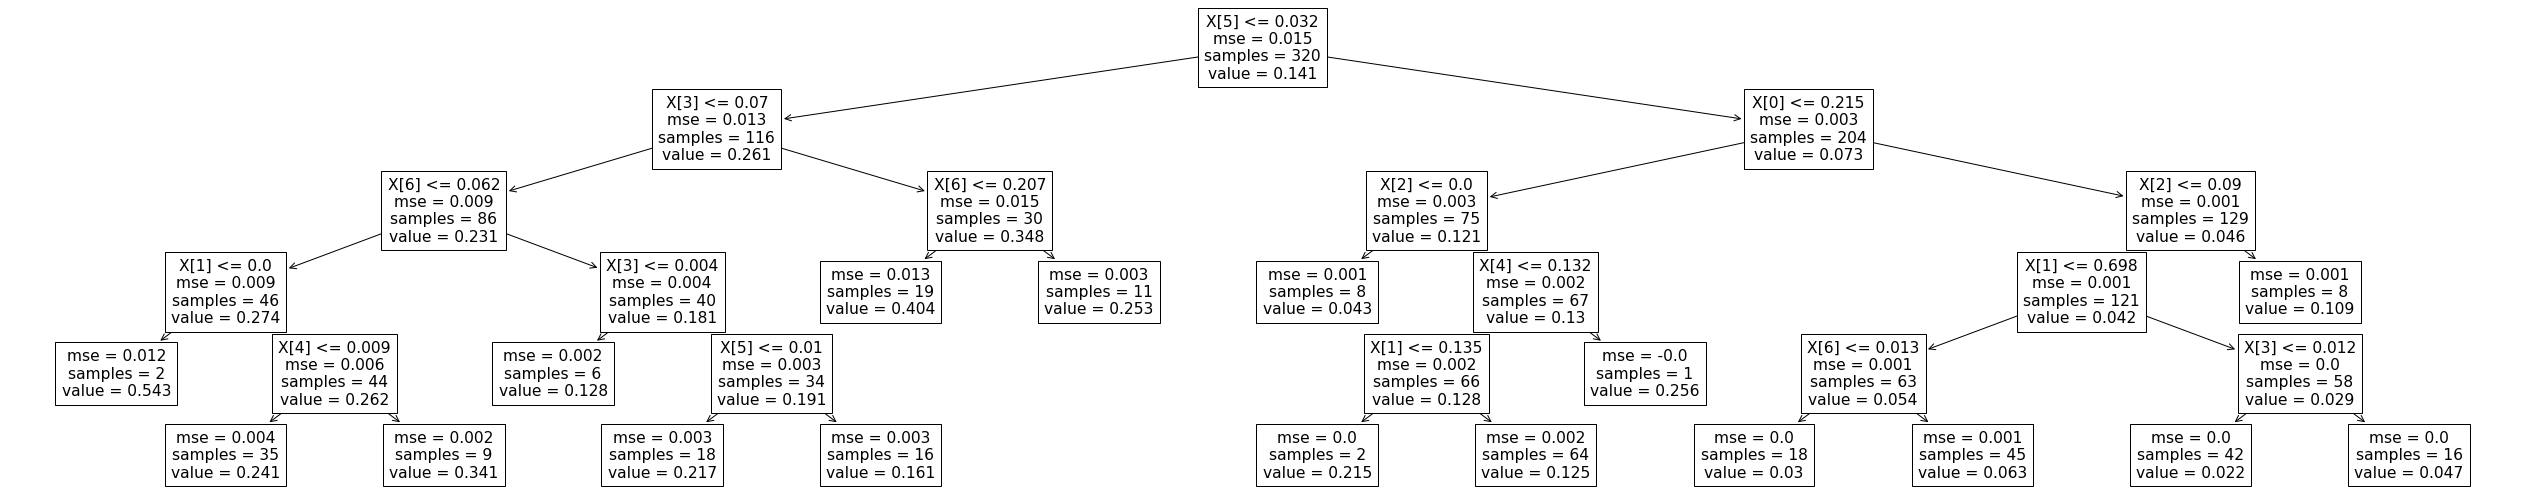

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 

dt_m1  = DecisionTreeRegressor(criterion='mse',
                              max_depth=5,
                              min_samples_split = 20, 
                              random_state=0)


dt_m1.fit(X_train_rfe_dt, y_train[:, np.newaxis]);

f, ax = plt.subplots(figsize=(45, 9))
tree.plot_tree(dt_m1);

dot_data = tree.export_graphviz(dt_m1, out_file=None, 
                                feature_names = ft_names[ft_rfe_dt_msk],
                                filled=True, rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("Multi_resist_idx") 

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 

dt_m1  = DecisionTreeRegressor(criterion='mse',
                              max_depth=5,
                              min_samples_split = 20, 
                              random_state=0)


dt_m1.fit(X_train_sel, y_train[:, np.newaxis]);

f, ax = plt.subplots(figsize=(45, 9))
tree.plot_tree(dt_m1);

dot_data = tree.export_graphviz(dt_m1, out_file=None, 
                                feature_names = ft_names[ft_sel_msk],
                                filled=True, rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("ccpp_Multi_resist_idx") 

In [ ]:
!pip install seaborn-qqplot;

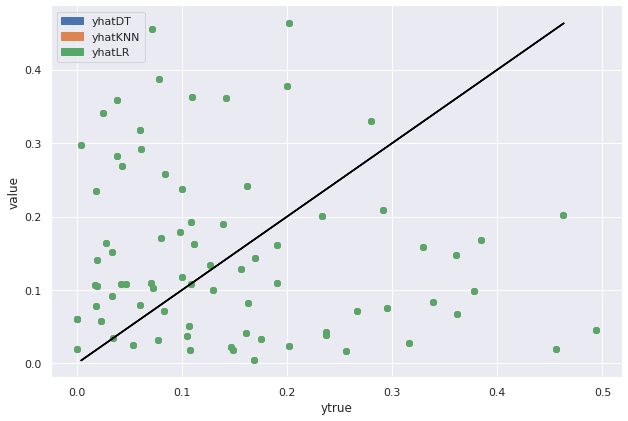

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

from seaborn_qqplot import pplot

#--------
### GRAPH QQPLOTS

x_plt = np.linspace(1, y_hat.shape[0], y_hat.shape[0])
mod_res = np.hstack((x_plt[:,np.newaxis],
                     y_test[:,np.newaxis],
                     y_hat,
                     y_hatknn,
                     y_hatdt[:,np.newaxis])) 

mod_res_df = pd.DataFrame(mod_res, 
                          columns=['index', 'ytrue','yhatLR', 'yhatKNN', 'yhatDT'])

mod_res_df_mlt = pd.melt(mod_res_df, 
                         id_vars=['ytrue'],
                         value_vars =['yhatLR', 'yhatKNN', 'yhatDT'])

mod_res_df_mlt['variable'] = mod_res_df_mlt['variable'].astype('category')


pplot(mod_res_df_mlt, x="ytrue", y="value", 
       hue = "variable", height = 6, aspect = 1.5,
       display_kws={"identity":True});

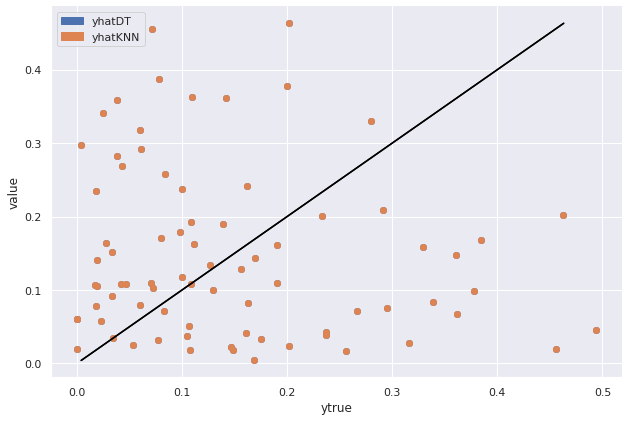

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

from seaborn_qqplot import pplot

#--------
### GRAPH QQPLOTS

x_plt = np.linspace(1, y_hat.shape[0], y_hat.shape[0])
mod_res = np.hstack((x_plt[:,np.newaxis],
                     y_test[:,np.newaxis],
#                     y_hat,
                     y_hatknn,
                     y_hatdt[:,np.newaxis])) 

mod_res_df = pd.DataFrame(mod_res, 
                          columns=['index', 'ytrue', 'yhatKNN', 'yhatDT'])

mod_res_df_mlt = pd.melt(mod_res_df, 
                         id_vars=['ytrue'],
                         value_vars =['yhatKNN', 'yhatDT'])

mod_res_df_mlt['variable'] = mod_res_df_mlt['variable'].astype('category')


pplot(mod_res_df_mlt, x="ytrue", y="value", 
       hue = "variable", height = 6, aspect = 1.5,
       display_kws={"identity":True});

In [ ]:
pip install shap xgboost

     |████████████████████████████████| 358kB 5.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491629 sha256=0cb01380c42e72621aeaa4e0c46933d65ec56770b6a001dcaaa13b4cd498496d
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
pip install shap

In [ ]:
import argparse
import shap
shap.initjs()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import xgboost as xgb
from xgboost import XGBRegressor,XGBClassifier,XGBRFRegressor
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold,RepeatedKFold,cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd


df = pd.read_csv('data_complete_int_copy.csv')


X = df.iloc[:,15:24]
y = df['multi_R_perc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=242)

In [ ]:
no_poly = 3

std_sclr = StandardScaler()
sclr_01 = MinMaxScaler()

polyFt_m = PolynomialFeatures(no_poly)

lr_m  = LinearRegression()
knn_m = KNeighborsRegressor(n_neighbors=5)
dt_m  = DecisionTreeRegressor(criterion='mse',
                              max_depth=5,
                              min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                              random_state=0)


max_depth = 3
min_child_weight = 10
subsample = 0.9
colsample_bytree = 0.2
#objective ='reg:logistic'
objective ='reg:squarederror'
num_estimators = 100
learning_rate = 0.3

xgb_r = XGBRegressor(max_depth=max_depth,
                min_child_weight=min_child_weight,
                subsample=subsample,
                colsample_bytree=colsample_bytree,
                objective=objective,
                n_estimators=num_estimators,
                learning_rate=learning_rate)

In [ ]:
no_poly = 3

std_sclr = StandardScaler()
sclr_01 = MinMaxScaler()

polyFt_m = PolynomialFeatures(no_poly)

lr_m  = LinearRegression()
knn_m = KNeighborsRegressor(n_neighbors=5)
dt_m  = DecisionTreeRegressor(criterion='mse',
                              max_depth=5,
                              min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                              random_state=0)


max_depth = 3
#min_child_weight = 10
subsample = 0.5
#colsample_bytree = 0.2
#objective ='reg:logistic'
objective ='reg:squarederror'
#num_estimators = 100
learning_rate = 0.3

xgb_r = XGBRegressor(max_depth=max_depth,
                subsample=subsample,
                objective=objective,
                learning_rate=learning_rate)

In [ ]:
no_poly = 3

std_sclr = StandardScaler()
sclr_01 = MinMaxScaler()

polyFt_m = PolynomialFeatures(no_poly)

lr_m  = LinearRegression()
knn_m = KNeighborsRegressor(n_neighbors=5)
dt_m  = DecisionTreeRegressor(criterion='mse',
                              max_depth=5,
                              min_samples_split = 20, 
                            #  min_samples_leaf = 10, 
                              random_state=0)


max_depth = 3
#min_child_weight = 10
subsample = 0.5
#colsample_bytree = 0.2
#objective ='reg:logistic'
objective ='reg:squarederror'
#num_estimators = 100
learning_rate = 0.3

xgb_r = XGBRegressor(max_depth=max_depth,
                subsample=subsample,
                objective=objective,
                learning_rate=learning_rate)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
 
X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)
 
sel = VarianceThreshold(threshold=(0.03))
X_train_sel = sel.fit_transform(X_train_tmp)
 
#Obtain a mask of True and False values: 
#true -> feat is selected
#false -> otherwise
ft_sel_msk = sel.get_support()
 
ft_names = polyFt_m.get_feature_names(X.columns)
ft_names = np.asarray(ft_names)
# print('Antes:', ft_names)
# print('Despues:', ft_names[ft_msk])
 
X_train_sel = pd.DataFrame(X_train_sel,
                   columns=ft_names[ft_sel_msk])
 
#print(X_train_sel)

In [ ]:
model_pl = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         lr_m)

model_knn = make_pipeline(sclr_01,
                          polyFt_m,
                          sel,
                          knn_m)

model_dt = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         dt_m)


model_xgb  = make_pipeline(sclr_01,
                         polyFt_m,
                         sel,
                         xgb_r)

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

#--------
### EVALUATE CV TRAINING ERROR

scoring = {'R2': make_scorer(r2_score), 
           'RMSE': make_scorer(mean_squared_error)}

lrm_scr = cross_validate(model_pl, X_train, y_train, 
                          scoring = scoring, cv=10)
knn_scr = cross_validate(model_knn, X_train, y_train, 
                          scoring = scoring, cv=10)
dt_scr = cross_validate(model_dt, X_train, y_train, 
                         scoring = scoring, cv=10)

xgb_scr = cross_validate(model_xgb, X_train, y_train, 
                         scoring = scoring, cv=10)

print('TRAIN CV ERROR----')

print('LRM_R2: ', np.mean(lrm_scr.get('test_R2')))
print('KNN_R2: ', np.mean(knn_scr.get('test_R2')))
print('DT_R2: ', np.mean(dt_scr.get('test_R2')))
print('XGB_R2: ', np.mean(xgb_scr.get('test_R2')))
print()
print('LRM_RMSE: ', np.mean(lrm_scr.get('test_RMSE')))
print('KNN_RMSE: ', np.mean(knn_scr.get('test_RMSE')))
print('DT_RMSE: ', np.mean(dt_scr.get('test_RMSE')))
print('XGB_RMSE: ', np.mean(xgb_scr.get('test_RMSE')))

TRAIN CV ERROR----
LRM_R2:  0.49684139562585167
KNN_R2:  0.7471863593687013
DT_R2:  0.6590309289057155
XGB_R2:  0.7051719476836273

LRM_RMSE:  0.007789896402874317
KNN_RMSE:  0.004166169294333618
DT_RMSE:  0.00524681358541206
XGB_RMSE:  0.004828942552214906


In [ ]:
model_pl.fit(X_train, y_train)
model_knn.fit(X_train, y_train)
model_dt.fit(X_train, y_train);
model_xgb.fit(X_train, y_train);

# #--------
# ### PREDICT TEST DATA 

y_hat    = model_pl.predict(X_test)
y_hatknn = model_knn.predict(X_test)
y_hatdt  = model_dt.predict(X_test)
y_hatxgb = model_xgb.predict(X_test)

# #--------
# ### PRINT SCORES

print('TEST ERROR----')

print('LR R2: ',r2_score(y_test,y_hat))
print('KNN R2: ',r2_score(y_test,y_hatknn))
print('DT R2: ',r2_score(y_test,y_hatdt))
print('XGB R2: ',r2_score(y_test,y_hatxgb))
print()
print('LR RMSE: ',mean_squared_error(y_test,y_hat, squared=False))
print('KNN RMSE: ',mean_squared_error(y_test,y_hatknn, squared=False))
print('DT RMSE: ',mean_squared_error(y_test,y_hatdt, squared=False))
print('XGB RMSE: ',mean_squared_error(y_test,y_hat, squared=False))

TEST ERROR----
LR R2:  0.6482184395886692
KNN R2:  0.7986565842955922
DT R2:  0.5818355001856683
XGB R2:  0.6991063981011896

LR RMSE:  0.0756682751041918
KNN RMSE:  0.057246114463715796
DT RMSE:  0.08249941687725254
XGB RMSE:  0.0756682751041918


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

poly_grade = 3

std_scl = StandardScaler()
poly = PolynomialFeatures(poly_grade)

df = pd.read_csv('data_complete_int_copy.csv')


X = df.iloc[:,15:24]
y = df['multi_R_perc']

# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.2, 
#                                                     random_state=1)

#Standardize X_train into X_train_scl
X_train_scl = std_scl.fit_transform(X) #Standardize and assign it to a variable

#Construct a DataFrame with column names
X_train_scl_df = pd.DataFrame(X_train_scl, 
                              index=X.index, 
                              columns=X.columns)

#Create PolynomialFeatures -> get their names
p_model     = poly.fit(X_train_scl_df)
poly_names  = p_model.get_feature_names(X_train_scl_df.columns)

#Transform X_train_scl into X_train_poly where polynomial features are stored
X_train_poly    = poly.fit_transform(X_train_scl_df)
X_train_poly_df = pd.DataFrame(X_train_poly, 
                              index=X.index, 
                              columns= poly_names)

#Create the full Train_df which is the matrix composed by Xy
all_names = np.concatenate((X_train_poly_df.columns, 'multi_R_perc'), axis=None)
Train_ndarray = np.hstack([X_train_poly_df, y[:, np.newaxis]])

Train_df = pd.DataFrame(Train_ndarray, 
                              index=X.index, 
                              columns = all_names)

# Compute the correlation matrix
corr_mtx = Train_df.corr()
# corr_mtx = Train_df.corr('spearman')

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr_mtx, dtype=np.bool))

f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corr_mtx, 
            # mask=mask, 
            cmap=sns.color_palette("coolwarm", 20))
# sns.heatmap(corr_mtx,ax=ax, cmap ="YlGnBu", linewidths = 0.1,)


In [ ]:
import argparse
import shap
shap.initjs()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import xgboost as xgb
from xgboost import XGBRegressor,XGBClassifier,XGBRFRegressor
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold,RepeatedKFold,cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
df = pd.read_csv('data_complete_int_copy.csv')

X = df.iloc[:,15:24]
y = df['multi_R_perc']

In [ ]:
def training(X,y):
    """" Training - fine tuning """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=242)
    max_depth = 3
    min_child_weight = 10
    subsample = 0.9
    colsample_bytree = 0.2
    objective ='reg:logistic'
#    objective ='reg:squarederror'
    num_estimators = 100
    learning_rate = 0.3
        
#    sample_weights = class_weight.compute_sample_weight('balanced', y_train) #clases desbalanceadas
    # define the model evaluation procedure
#    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=442)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)    
#    parameters=parameters

    # estimator = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
    # grid = GridSearchCV(estimator=estimator, param_grid=parameters, cv = cv, scoring='roc_auc')
    # model = grid.fit(X_train,y_train)
#    model = XGBRFRegressor(n_estimators=10000, subsample=0.9, colsample_bynode=0.2)
    model = XGBRegressor(max_depth=max_depth,
                min_child_weight=min_child_weight,
                subsample=subsample,
                colsample_bytree=colsample_bytree,
                objective=objective,
                n_estimators=num_estimators,
                learning_rate=learning_rate)
    model.fit(X_train, y_train)      
    n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # define the model evaluation procedure
    print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

    return model, X_train, X_test, y_train, y_test

In [ ]:
def generating_metrics(model_ehr, x, y):
    """Función para generar las métricas: AUC, sensibilidad, especificidad, F1, precisión"""
    y_pred_proba = model_ehr.predict_proba(x)[:, 1]
    y_pred = model_ehr.predict(x)
    acc = accuracy_score(y,y_pred)
    tn, fp, fn, tp = confusion_matrix(y,y_pred).ravel()
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_pred)
    sensitivity = tp / (tp+fn)
    specificity = tn / (tn+fp)
    auc_score = auc(false_positive_rate, true_positive_rate)
    f1 = f1_score(y, y_pred)
    return auc_score, sensitivity, specificity, f1, acc, false_positive_rate, true_positive_rate

def plot_roc(model,X_test, y_test,name):
    """Función para generar la curva ROC"""
    print("mean_cross_val_score: ", model.best_score_)
    print("best_params:",model.best_params_)
    print("=============================================================================")
    auc_test, sens_test, spec_test, f1_test, acc_test,fpr_test, tpr_test = generating_metrics(model, 
                                                                                              X_test, y_test)
    print("auc_test: {}, sens_test {}, spec_test: {}, f1_test {}, acc_test {}".format(auc_test, sens_test, spec_test, f1_test, acc_test))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_test, tpr_test, label='Testing (AUC=%0.2f)' % auc_test, color='darkorange')
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.legend(loc='best')
    plt.title('Curva ROC del modelo de predicción de mortalidad')
    plt.show()
    name_roc = name+'.png'
    plt.savefig(name_roc)

def plot_shap_values(model,X,feature_list,title):
    """Función para identificar las variables clínicas"""
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    plt.title(title)
    shap.summary_plot(shap_values, X, feature_names=feature_list, plot_type='bar')
    plt.title(title)
    shap.summary_plot(shap_values, X,feature_names=feature_list,show = 'False')

def saving_model(model,model_name,logs_file):
    """Función para guardar el modelo"""
    import joblib
    model_name = model_name + '.pkl'
    url_save = os.path.join(logs_file,str(model_name))
    print(url_save)
    joblib.dump(model, url_save)

MAE: -0.067 (0.010)
Feature list: 
 Index(['DDD_sys_commun', 'per_cap_US.', 'GDP_total', 'GDP_._health',
       'Out_pocket_exp', 'HDR', 'ctrl_corrup', 'GOV_effect', 'rule_law'],
      dtype='object')


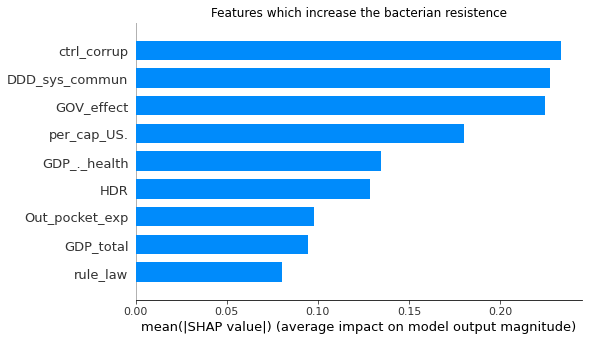

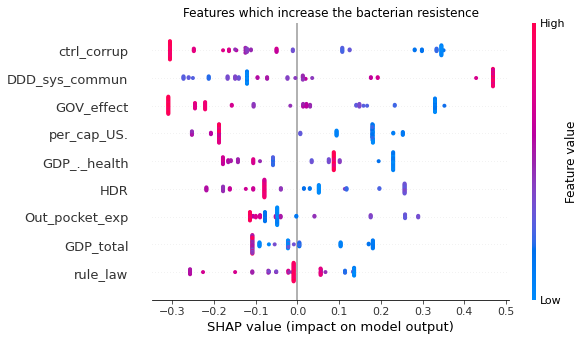

In [ ]:
#X = ccpp_df.iloc[:,15:24]
#y = ccpp_df['r_index']/100.
y = ccpp_df['multi_R_perc']

model,X_train, X_test, y_train, y_test = training(X,y)
print("Feature list: \n", X.columns)

feature_list = X.columns
#plot_roc(model,X_test, y_test,'model')
title = "Features which increase the bacterian resistence"
plot_shap_values(model,X_test,feature_list,title)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline

y_hat = model.predict(X_test)
# y_hat = model_pl.predict(X_train)

print('R2: ',r2_score(y_test,y_hat))
# r2_score(y_train,y_hat)
print('RMSE: ',mean_squared_error(y_test,y_hat, squared=False), 'MW')

R2:  0.7412625992792214
RMSE:  0.06489435258593701 MW


In [ ]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'continuous'

In [ ]:
model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
model.fit(X_train, y_train)

[22:23:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.2,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.9, verbosity=1)

In [ ]:
def model_predict(data_asarray):
    data_asframe =  pd.DataFrame(data_asarray, columns=feature_list)
    return model.predict(data_asframe)

In [ ]:
rf_explainer = shap.KernelExplainer(model_predict, X_test)
rf_shap_values = rf_explainer.shap_values(X_test)

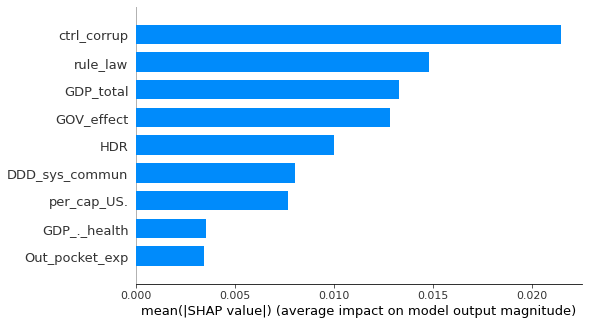

In [ ]:
shap.summary_plot(rf_shap_values, X_test, plot_type="bar")

In [ ]:
y_hat = model.predict(X_test)
# y_hat = model_pl.predict(X_train)

print('R2: ',r2_score(y_test,y_hat))
# r2_score(y_train,y_hat)
print('RMSE: ',mean_squared_error(y_test,y_hat, squared=False))

R2:  0.6704104751420628
RMSE:  0.07324264150420866 MW


Next, it is presented the results of X_train

In [ ]:
rf_explainer = shap.KernelExplainer(model_predict, X_train)
rf_shap_values = rf_explainer.shap_values(X_train)

Using 320 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


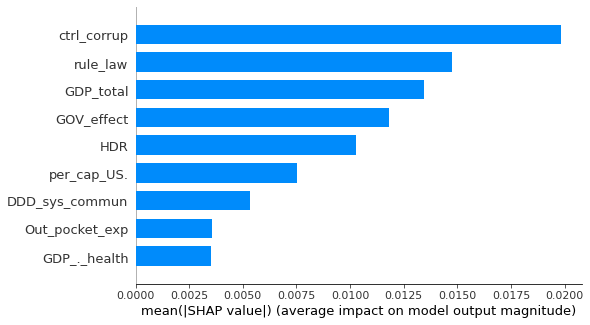

In [ ]:
shap.summary_plot(rf_shap_values, X_train, plot_type="bar")

In [ ]:
y_hat = model.predict(X_train)
# y_hat = model_pl.predict(X_train)

print('R2: ',r2_score(y_train,y_hat))
# r2_score(y_train,y_hat)
print('RMSE: ',mean_squared_error(y_train,y_hat, squared=False))

R2:  0.7235029078020284
RMSE:  0.06668396545156009 MW


[01:20:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.08756537 0.11521929 0.08967007 0.08351848 0.07844005 0.12682463
 0.11177067 0.15768804 0.1493034 ]


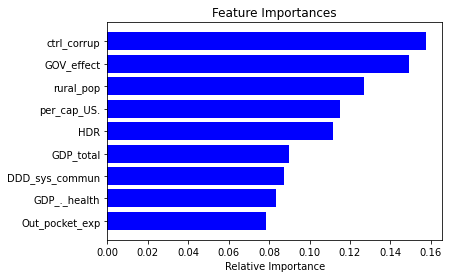

In [ ]:
#rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model = XGBRFRegressor(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
model.fit(X_train, y_train)  
print(model.feature_importances_)

importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

[0.06903562 0.04142528 0.0306615  0.03635333 0.05577362 0.10240553
 0.02874377 0.5884525  0.04714886]


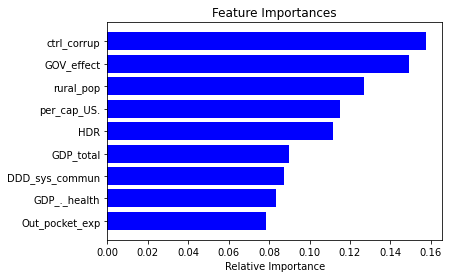

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=20)
rf.fit(X_train, y_train)
print(rf.feature_importances_)

importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()  

The correct Shap Values code until now. It must be reviewed the other codes on Shap Values


In [ ]:
import shap
import xgboost
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# X,y = shap.datasets.nhanesi()
# X_display,y_display = shap.datasets.nhanesi(display=True) # human readable feature values

# xgb_full = xgboost.DMatrix(X, label=y)

# # create a train/test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
# xgb_train = xgboost.DMatrix(X_train, label=y_train)
# xgb_test = xgboost.DMatrix(X_test, label=y_test)

In [ ]:
# X,y = shap.datasets.nhanesi()
# X.head()

In [ ]:
xgb_full = xgboost.DMatrix(X, label=y)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
xgb_train = xgboost.DMatrix(X_train, label=y_train)
xgb_test = xgboost.DMatrix(X_test, label=y_test)

In [ ]:
X_train.head()

,DDD_sys_commun,per_cap_US.,GDP_total,GDP_._health,Out_pocket_exp,HDR,ctrl_corrup,GOV_effect,rule_law
98,10.0085,5361.0,57644.47997,9.28,9.923715,0.906,2.118235,1.696206,1.761363
81,15.8673,1449.0,22698.85396,6.36,16.132970,0.854,0.358294,1.013642,0.914494
50,12.9797,4473.0,46855.77175,9.53,18.806139,0.881,2.013397,1.870187,1.960128
244,15.8313,9241.0,102913.45080,8.92,14.594196,0.946,2.294475,1.884967,1.980010
340,21.3015,1175.0,16505.97505,7.10,17.888252,0.851,0.229156,0.894068,0.646802


In [ ]:
X_train.shape

(320, 9)

In [ ]:
# use validation set to choose # of trees
params = {
#    "eta": 0.002, # learning_rate
    "eta": 0.3,
    "max_depth": 3,
#    "objective": "survival:cox",
    "subsample": 0.5
}
model_train = xgboost.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)

[0]	test-rmse:0.268571
[1000]	test-rmse:0.061285
[2000]	test-rmse:0.061274
[3000]	test-rmse:0.061273
[4000]	test-rmse:0.061276
[5000]	test-rmse:0.061283
[6000]	test-rmse:0.061284
[7000]	test-rmse:0.061286
[8000]	test-rmse:0.061294
[9000]	test-rmse:0.061291
[9999]	test-rmse:0.061288


In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

no_poly = 3

sclr_01 = MinMaxScaler()
polyFt_m = PolynomialFeatures(no_poly)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train_tmp = sclr_01.fit_transform(X_train)
X_train_tmp = polyFt_m.fit_transform(X_train_tmp)


X_test_tmp = sclr_01.fit_transform(X_test)
X_test_tmp = polyFt_m.fit_transform(X_test_tmp)
 
sel = VarianceThreshold(threshold=(0.02))
X_train_sel = sel.fit_transform(X_train_tmp)
X_test_sel = sel.fit_transform(X_test_tmp)


xgb_train = xgboost.DMatrix(X_train_sel, label=y_train)
xgb_test  = xgboost.DMatrix(X_test_sel, label=y_test)

In [ ]:
# use validation set to choose # of trees
params = {
    "eta" : 0.01,
    "max_depth" : 6,
#    "min_child_weight" : 10,
    "subsample": 0.5,
#    "colsample_bytree" : 0.2,
    "objective" :'reg:logistic'
#    "objective" :'reg:squarederror',
#    "num_estimators" : 100
#    "eta": 0.002, # learning_rate
}
model_train = xgboost.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)

ValueError: ignored

In [ ]:
# use validation set to choose # of trees
params = {
    "eta" : 0.01,
    "max_depth" : 6,
#    "min_child_weight" : 10,
    "subsample": 0.5,
#    "colsample_bytree" : 0.2,
    "objective" :'reg:logistic'
#    "objective" :'reg:squarederror',
#    "num_estimators" : 100
#    "eta": 0.002, # learning_rate
}
model_train = xgboost.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)

[0]	test-rmse:0.370334
[1000]	test-rmse:0.06081
[2000]	test-rmse:0.060062
[3000]	test-rmse:0.060044
[4000]	test-rmse:0.060017
[5000]	test-rmse:0.060338
[6000]	test-rmse:0.060556
[7000]	test-rmse:0.060794
[8000]	test-rmse:0.061026
[9000]	test-rmse:0.061164
[9999]	test-rmse:0.061353


In [ ]:
# use validation set to choose # of trees
params = {
#    "eta": 0.002, # learning_rate
    "eta": 0.1,
    "max_depth": 10,
#    "objective": "survival:cox",
    "subsample": 0.5
}
model_train = xgboost.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)

[0]	test-rmse:0.338279
[1000]	test-rmse:0.063095
[2000]	test-rmse:0.063103
[3000]	test-rmse:0.063106
[4000]	test-rmse:0.063107
[5000]	test-rmse:0.063099
[6000]	test-rmse:0.063103
[7000]	test-rmse:0.06311
[8000]	test-rmse:0.06311
[9000]	test-rmse:0.063109
[9999]	test-rmse:0.063113


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline

y_hat = model_train.predict(xgb_test)
# y_hat = model_pl.predict(X_train)

print('R2: ',r2_score(y_test,y_hat))
# r2_score(y_train,y_hat)
print('RMSE: ',mean_squared_error(y_test,y_hat, squared=False))

R2:  0.77879352309346
RMSE:  0.06135324175344636


In [ ]:
# # train final model on the full data set
# model = xgboost.train(params, xgb_full, 5000, evals = [(xgb_full, "test")], verbose_eval=1000)

[0]	test-rmse:0.271859
[1000]	test-rmse:0.000419
[2000]	test-rmse:0.00038
[3000]	test-rmse:0.000364
[4000]	test-rmse:0.000354
[4999]	test-rmse:0.000345


In [ ]:
def c_statistic_harrell(pred, labels):
    total = 0
    matches = 0
    for i in range(len(labels)):
        for j in range(len(labels)):
            if labels[j] > 0 and abs(labels[i]) > labels[j]:
                total += 1
                if pred[j] > pred[i]:
                    matches += 1
    return matches/total

In [ ]:
# see how well we can order people by survival
#c_statistic_harrell(model_train.predict(xgb_test, ntree_limit=5000), y_test)

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X)

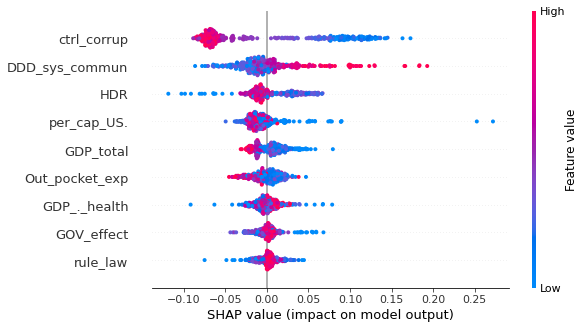

In [ ]:
shap.summary_plot(shap_values, X)

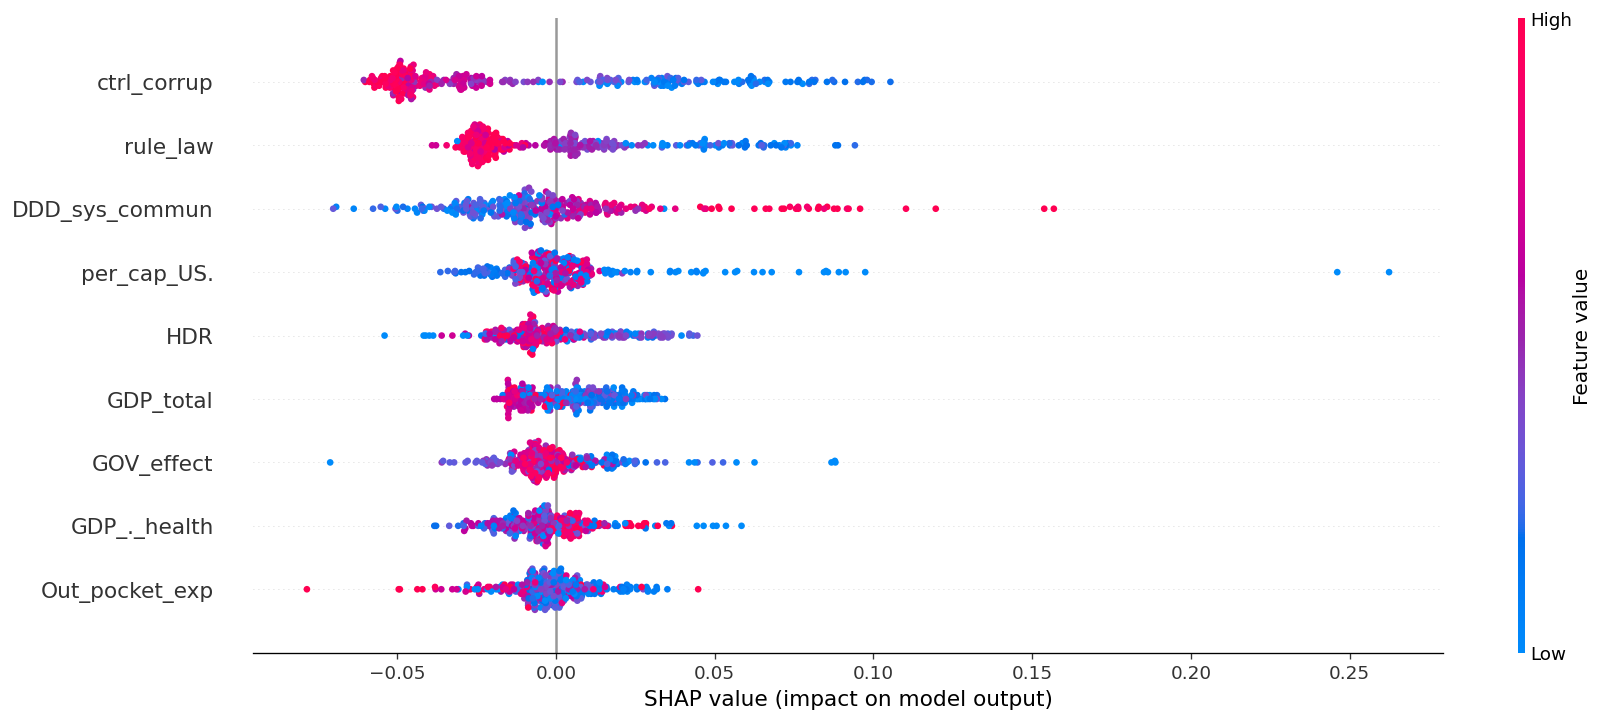

In [ ]:
shap_values = shap.TreeExplainer(model_train).shap_values(X_train)
fig, ax= plt.subplots(figsize=(16, 7),dpi=120)
shap.summary_plot(shap_values, X_train,show=False,plot_size=(16,7))
ax.figure.savefig('ShapValuesTrain.pdf')

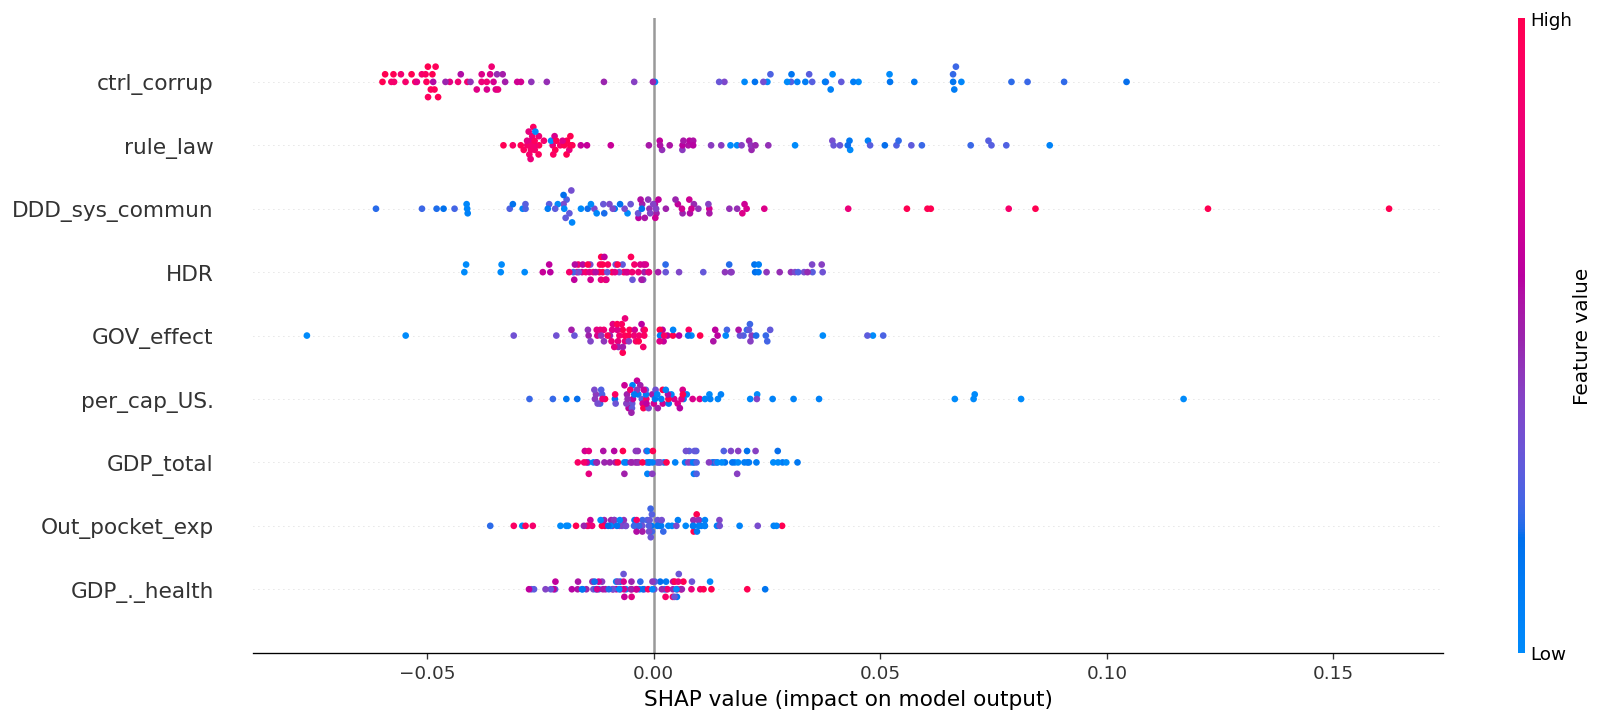

In [ ]:
shap_values = shap.TreeExplainer(model_train).shap_values(X_test)
fig, ax= plt.subplots(figsize=(16, 7),dpi=120)
shap.summary_plot(shap_values, X_test,show=False,plot_size=(16,7))
ax.figure.savefig('ShapValuesTest.pdf')

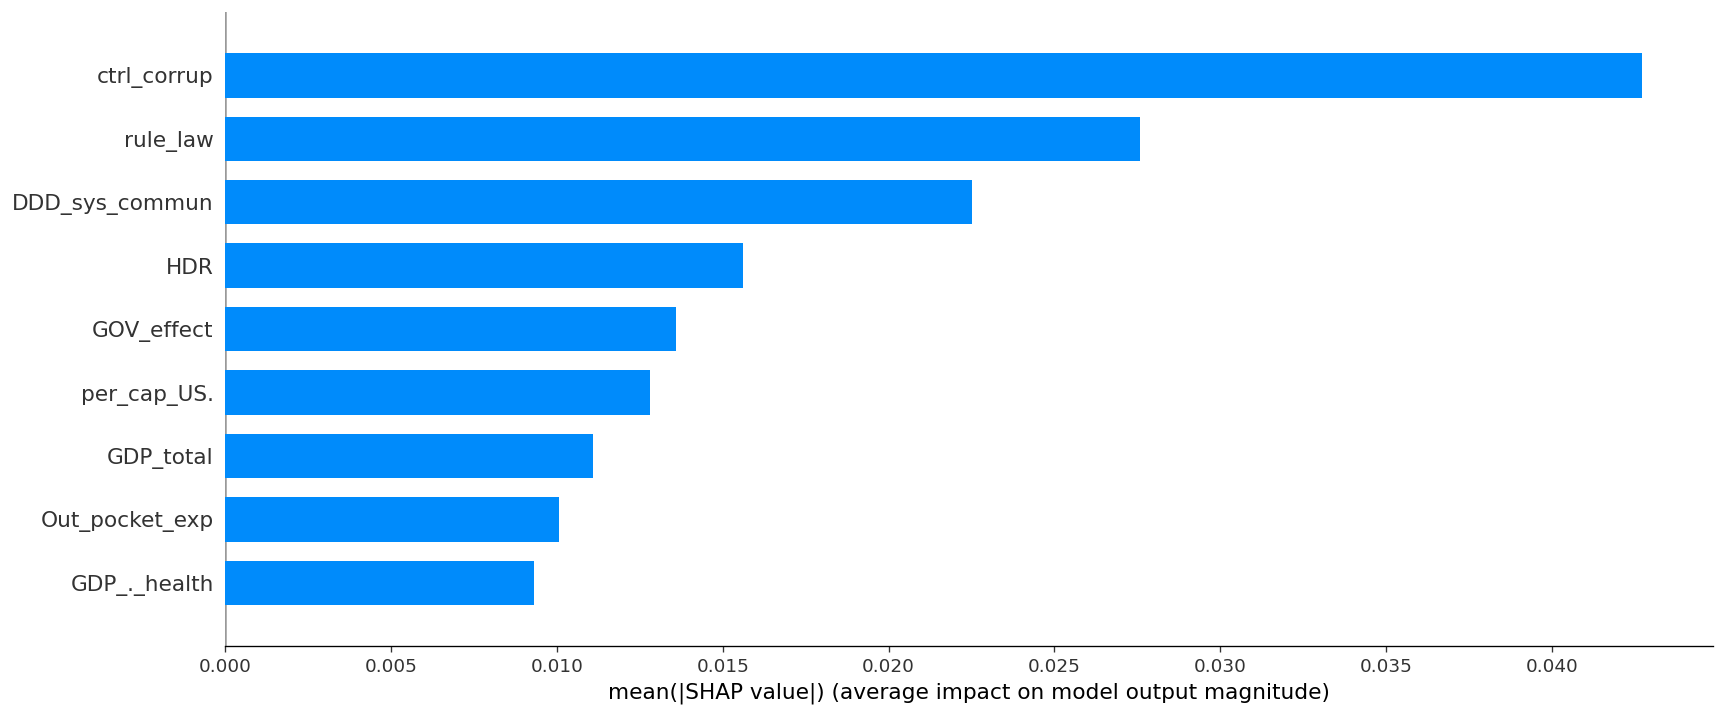

In [ ]:
fig, ax= plt.subplots(figsize=(16, 7),dpi=120)
shap.summary_plot(shap_values, X_train, plot_type="bar",show=False,plot_size=(16,7))
ax.figure.savefig('ImportanceShapValues_train.pdf')

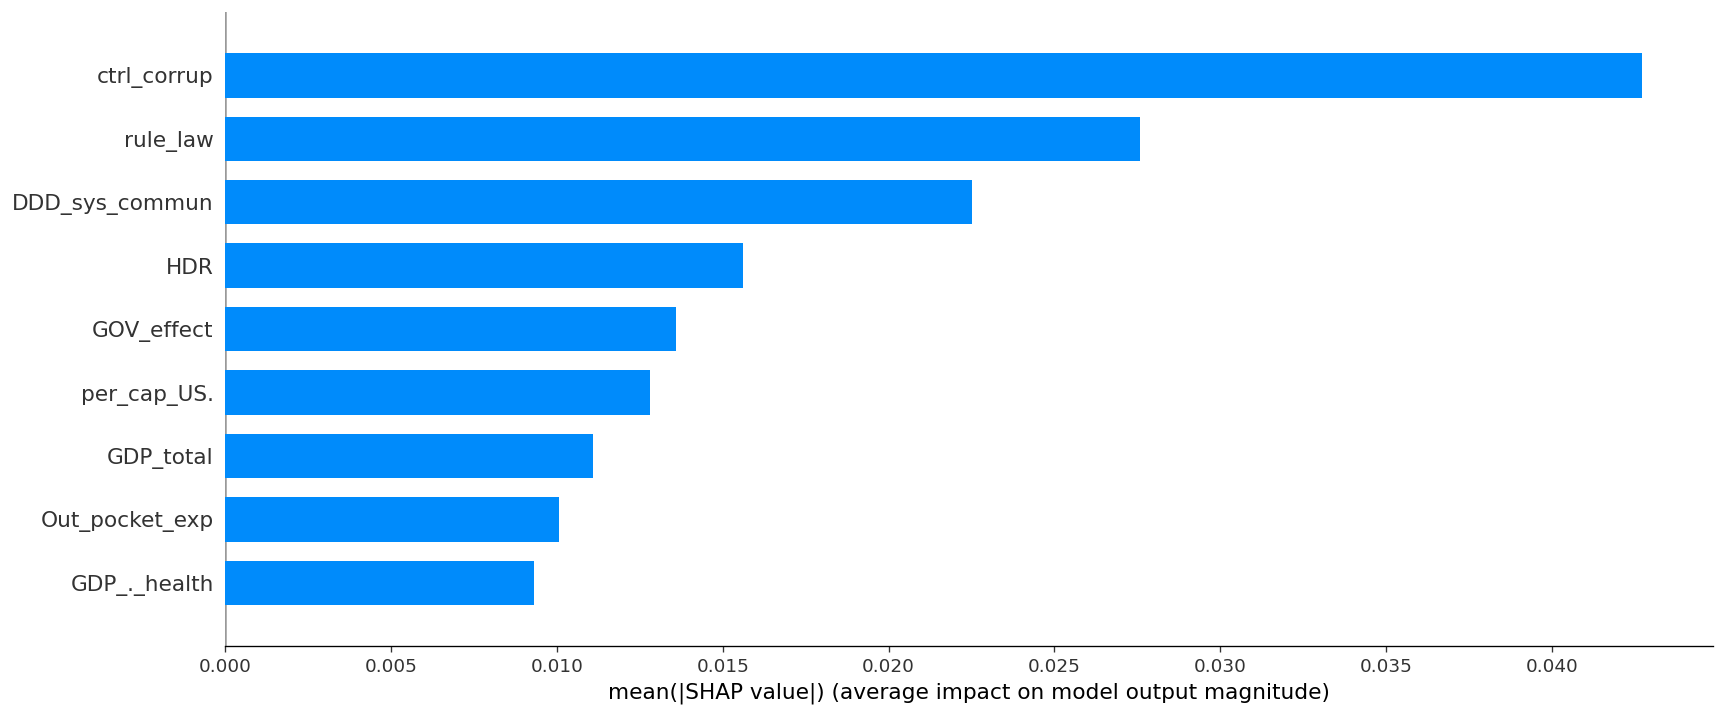

In [ ]:
shap_values = shap.TreeExplainer(model_train).shap_values(X_test)
fig, ax= plt.subplots(figsize=(16, 7),dpi=120)
shap.summary_plot(shap_values, X_test, plot_type="bar",show=False,plot_size=(16,7))
ax.figure.savefig('ImportanceShapValues_test.pdf')

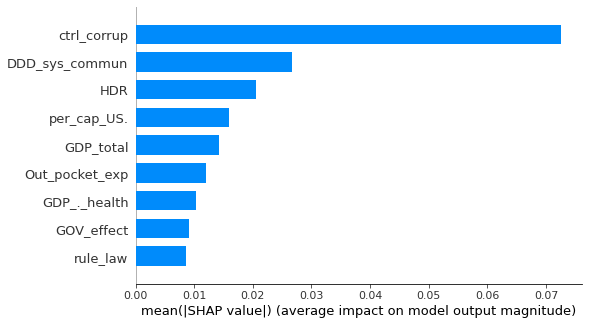

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline

y_hat = model_train.predict(xgb_test)
# y_hat = model_pl.predict(X_train)

print('R2: ',r2_score(y_test,y_hat))
# r2_score(y_train,y_hat)
print('RMSE: ',mean_squared_error(y_test,y_hat, squared=False))

R2:  0.7792655880742329
RMSE:  0.06128774144407003


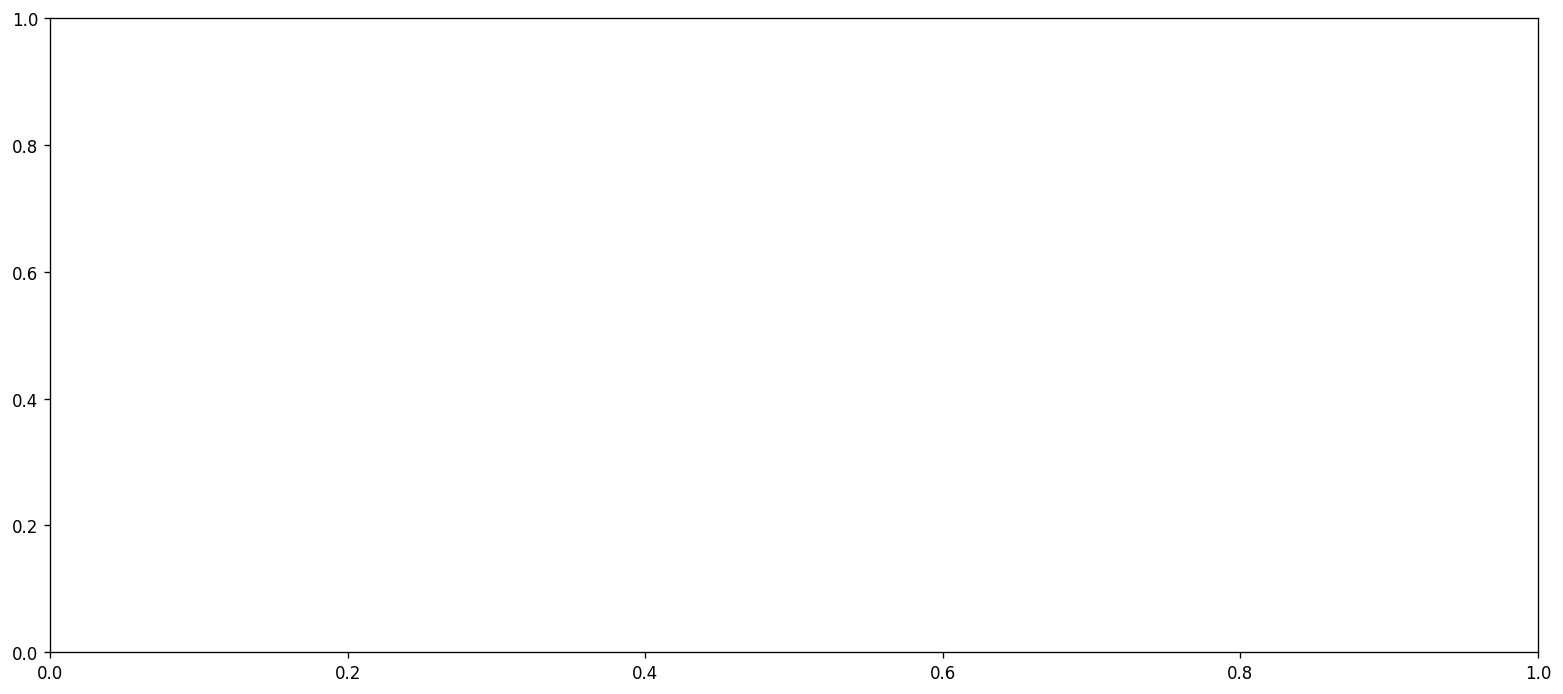

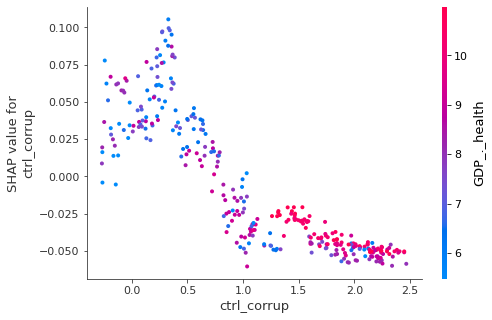

In [ ]:
shap_values = shap.TreeExplainer(model_train).shap_values(X_train)
fig, ax= plt.subplots(figsize=(16, 7),dpi=120)
shap.dependence_plot('ctrl_corrup',shap_values,X_train,show=False)
ax.figure.savefig('HDR.pdf')

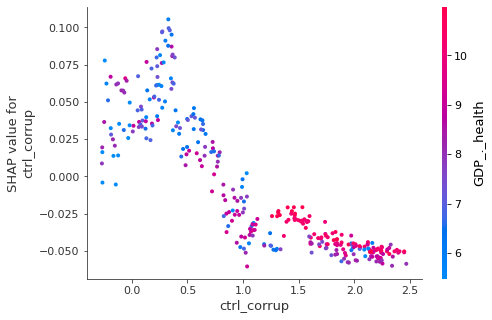

In [ ]:
shap_values = shap.TreeExplainer(model_train).shap_values(X_train)
shap.dependence_plot('ctrl_corrup',shap_values,X_train)

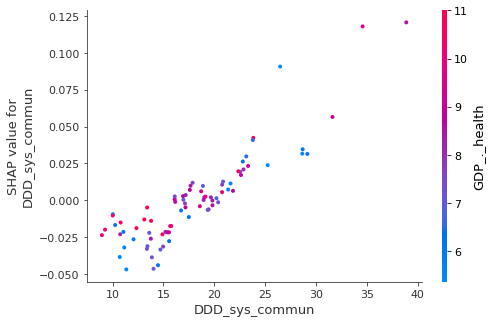

In [ ]:
shap.dependence_plot('DDD_sys_commun',shap_values,X_test)

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(model_train)
shap.force_plot(explainer.expected_value,shap_values[0] , X_test.iloc[0])

In [ ]:
shap.initjs()
shap_values = shap.TreeExplainer(model_train).shap_values(X_test)
#fig, ax= plt.subplots(figsize=(18, 9),dpi=140)
f=shap.force_plot(explainer.expected_value,shap_values , X_test,show=False)
shap.save_html("index.htm", f)
#matplotlib=True).savefig('scratch.jpeg')
#plt.savefig('force_plot.png')

In [ ]:
pip install pdfkit

In [ ]:
pip install wkhtmltopdf

  Created wheel for wkhtmltopdf: filename=wkhtmltopdf-0.2-cp37-none-any.whl size=11116 sha256=1c7dcd792e90459cf627ccd4fc65237215bc2336f60e54b2f65a73145a4e6bef
  Stored in directory: /root/.cache/pip/wheels/e4/87/c7/da5ceeaaf0a8c53c61f13796f3e99cdc92a047d013e948da8f
Successfully built wkhtmltopdf


In [ ]:
# import pdfkit
# pdfkit.from_file('index.htm', 'force_plot.pdf')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=2, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline

y_hat = model.predict(X_test)
# y_hat = model_pl.predict(X_train)

print('R2: ',r2_score(y_test,y_hat))
# r2_score(y_train,y_hat)
print('RMSE: ',mean_squared_error(y_test,y_hat, squared=False))

R2:  0.8122382638292572
RMSE:  0.057603557682723815


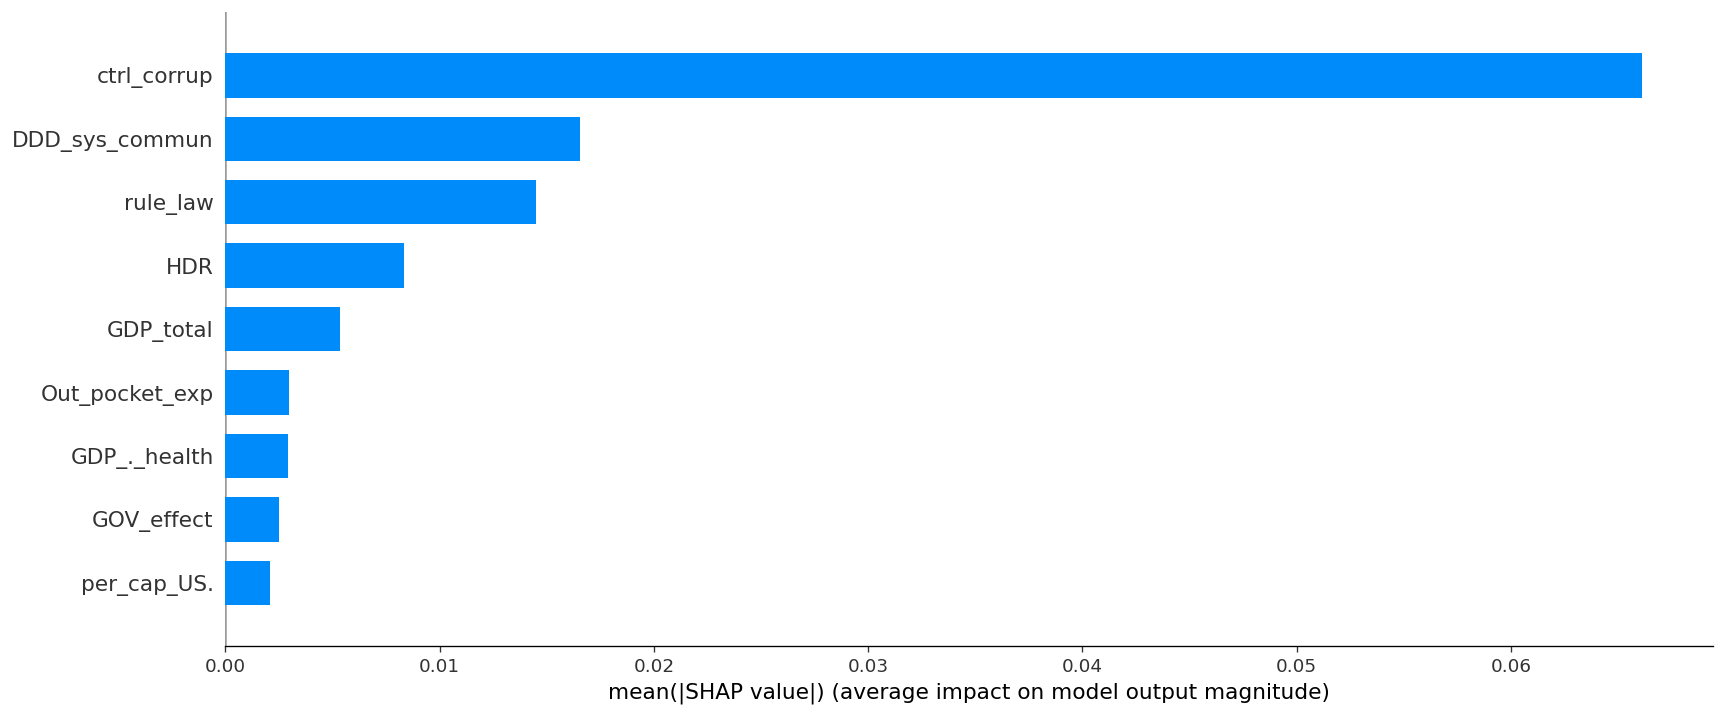

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
fig, ax= plt.subplots(figsize=(16, 7),dpi=120)
shap.summary_plot(shap_values, X_train, plot_type="bar",show=False,plot_size=(16,7))
ax.figure.savefig('ImpShapValues_train_RF.pdf')

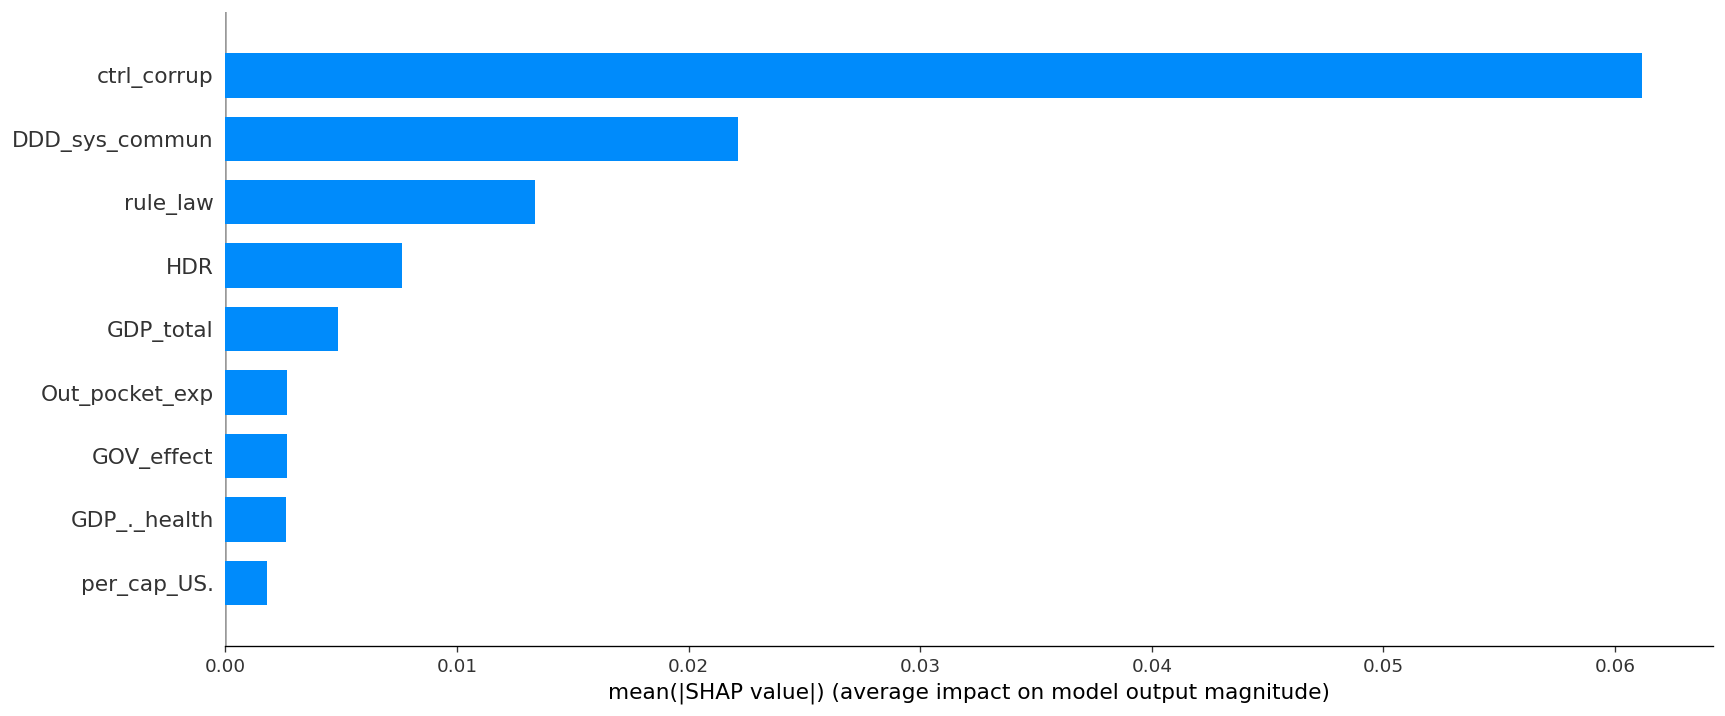

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X_test)
fig, ax= plt.subplots(figsize=(16, 7),dpi=120)
shap.summary_plot(shap_values, X_test, plot_type="bar",show=False,plot_size=(16,7))
ax.figure.savefig('ImpShapValues_test_RF.pdf')

[0.11516781 0.04784178 0.0229932  0.02889699 0.03842135 0.04903181
 0.3720146  0.0427741  0.28285836]


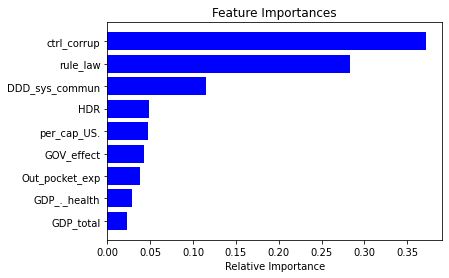

In [ ]:
print(model.feature_importances_)

importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()  

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
import six
from sklearn import tree
dotfile = six.StringIO()

i_tree = 0
for tree_in_forest in model.estimators_:
    if (i_tree <1):
       export_graphviz(tree_in_forest,
                feature_names=X.columns,
                filled=True,
                rounded=True)        
      #  tree.export_graphviz(tree_in_forest, out_file=dotfile)
      #  pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png('dtree'+ str(i_tree) +'.png')
      #  i_tree = i_tree + 1

export_graphviz(tree_in_forest,
                feature_names=X.columns,
                filled=True,
                rounded=True)

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="ctrl_corrup <= 0.695\\nmse = 0.014\\nsamples = 202\\nvalue = 0.139", fillcolor="#f9e2d1"] ;\n1 [label="DDD_sys_commun <= 25.784\\nmse = 0.011\\nsamples = 72\\nvalue = 0.257", fillcolor="#f4c9aa"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Out_pocket_exp <= 23.687\\nmse = 0.007\\nsamples = 61\\nvalue = 0.233", fillcolor="#f5ceb2"] ;\n1 -> 2 ;\n3 [label="GDP_._health <= 6.765\\nmse = 0.006\\nsamples = 31\\nvalue = 0.273", fillcolor="#f3c6a5"] ;\n2 -> 3 ;\n4 [label="DDD_sys_commun <= 23.882\\nmse = 0.003\\nsamples = 10\\nvalue = 0.347", fillcolor="#f0b68d"] ;\n3 -> 4 ;\n5 [label="GDP_._health <= 6.72\\nmse = 0.001\\nsamples = 9\\nvalue = 0.339", fillcolor="#f0b88f"] ;\n4 -> 5 ;\n6 [label="mse = 0.0\\nsamples = 7\\nvalue = 0.315", fillcolor="#f1bd97"] ;\n5 -> 6 ;\n7 [label="mse = 0.0\\nsamples = 2\\nvalue = 0.386", fillcolo

In [ ]:
import os
os.system('dot -Tpng tree.dot -o tree.png')

512

In [ ]:
pip install linearmodels

     |████████████████████████████████| 1.5MB 12.7MB/s 
     |████████████████████████████████| 9.5MB 46.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# Import and preprocess data
import pandas as pd
dataset = pd.read_csv('Guns.csv', usecols = ['state','year', 'income', 'violent'],\
 index_col = ['state', 'year'])
years = dataset.index.get_level_values('year').to_list()
dataset['year'] = pd.Categorical(years)

In [ ]:
dataset

violent     income  year
state   year                          
Alabama 1977    414.4   9563.148  1977
        1978    419.1   9932.000  1978
        1979    413.3   9877.028  1979
        1980    448.5   9541.428  1980
        1981    470.5   9548.351  1981
...               ...        ...   ...
Wyoming 1995    254.2  14070.160  1995
        1996    249.7  14032.230  1996
        1997    255.2  14790.980  1997
        1998    247.6  15225.510  1998
        1999    232.3  15765.070  1999

[1173 rows x 3 columns]

In [ ]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm
exog = sm.tools.tools.add_constant(dataset['income'])
endog = dataset['violent']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

In [ ]:
exog

const     income
state   year                  
Alabama 1977    1.0   9563.148
        1978    1.0   9932.000
        1979    1.0   9877.028
        1980    1.0   9541.428
        1981    1.0   9548.351
...             ...        ...
Wyoming 1995    1.0  14070.160
        1996    1.0  14032.230
        1997    1.0  14790.980
        1998    1.0  15225.510
        1999    1.0  15765.070

[1173 rows x 2 columns]

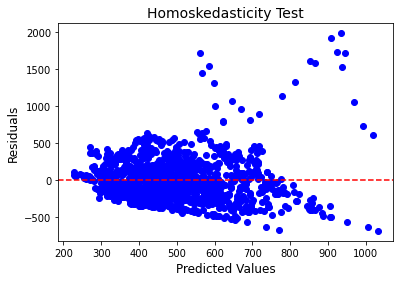

In [ ]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 12)
ax.set_ylabel('Residuals', fontsize = 12)
ax.set_title('Homoskedasticity Test', fontsize = 14)
plt.show()

In [ ]:
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([dataset, residuals_pooled_OLS], axis=1)

dataset
residuals_pooled_OLS
pooled_OLS_dataset

violent     income  year    residual
state   year                                      
Alabama 1977    414.4   9563.148  1977  133.505186
        1978    419.1   9932.000  1978  118.513111
        1979    413.3   9877.028  1979  115.647927
        1980    448.5   9541.428  1980  168.764762
        1981    470.5   9548.351  1981  190.395161
...               ...        ...   ...         ...
Wyoming 1995    254.2  14070.160  1995 -267.312787
        1996    249.7  14032.230  1996 -269.787801
        1997    255.2  14790.980  1997 -304.795544
        1998    247.6  15225.510  1998 -335.594002
        1999    232.3  15765.070  1999 -379.699746

[1173 rows x 4 columns]

In [ ]:
pooled_OLS_dataset[['residual']]

residual
state   year            
Alabama 1977  133.505186
        1978  118.513111
        1979  115.647927
        1980  168.764762
        1981  190.395161
...                  ...
Wyoming 1995 -267.312787
        1996 -269.787801
        1997 -304.795544
        1998 -335.594002
        1999 -379.699746

[1173 rows x 1 columns]

In [ ]:
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([dataset, residuals_pooled_OLS], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(['year'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(dataset['income']).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))


{'LM-Stat': 200.15502156044516, 'LM p-val': 3.4426217285898363e-44, 'F-Stat': 120.35903993735378, 'F p-val': 2.925453555718113e-48}


In [ ]:
# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 110.96166044221732, 'LM p-val': 6.032616972194746e-26, 'F-Stat': 122.34596392437214, 'F p-val': 4.048137598792713e-27}


In [ ]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

0.08937264851640209


In [ ]:
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects
exog = sm.tools.tools.add_constant(dataset['income'])
endog = dataset['violent']
# random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
#print results
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                violent   R-squared:                        0.1128
Estimator:              RandomEffects   R-squared (Between):              0.1159
No. Observations:                1173   R-squared (Within):               0.1127
Date:                Mon, Mar 29 2021   R-squared (Overall):              0.1156
Time:                        18:41:47   Log-likelihood                   -7109.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      148.90
Entities:                          51   P-value                           0.0000
Avg Obs:                       23.000   Distribution:                  F(1,1171)
Min Obs:                       23.000                                           
Max Obs:                       23.000   F-statistic (robust):             148.90
                            

In [ ]:
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results

print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                violent   R-squared:                        0.1127
Estimator:                   PanelOLS   R-squared (Between):              0.1141
No. Observations:                1173   R-squared (Within):               0.1127
Date:                Mon, Mar 29 2021   R-squared (Overall):              0.1140
Time:                        18:41:52   Log-likelihood                   -7081.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      142.39
Entities:                          51   P-value                           0.0000
Avg Obs:                       23.000   Distribution:                  F(1,1121)
Min Obs:                       23.000                                           
Max Obs:                       23.000   F-statistic (robust):             142.39
                            

In [ ]:
import numpy.linalg as la
from scipy import stats
import numpy as np

In [ ]:
def hausman(fe, re):
 b = fe.params
 B = re.params
 v_b = fe.cov
 v_B = re.cov
 df = b[np.abs(b) < 1e8].size
 chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
 
 pval = stats.chi2.sf(chi2, df)
 return chi2, df, pval

In [ ]:
hausman_results = hausman(fe_res, re_res) 
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

chi-Squared: 9.42637134337692
degrees of freedom: 2
p-Value: 0.008976136961460624


In [ ]:
import pandas as pd
import numpy as np

Dataset = pd.read_csv('data_complete_int_copy.csv', usecols = ['Country','Year','DDD_sys_commun',
                      'per_cap_US.',	'GDP_total','GDP_._health','Out_pocket_exp','HDR',
                      'ctrl_corrup','GOV_effect','rule_law','multi_R_perc'],
                     index_col = ['Country','Year'])

Dataset
#years = dataset.index.get_level_values('Year').to_list()
#dataset['Year'] = pd.Categorical(years)

,,multi_R_perc,DDD_sys_commun,per_cap_US.,GDP_total,GDP_._health,Out_pocket_exp,HDR,ctrl_corrup,GOV_effect,rule_law
Country,Year,,,,,,,,,,
Austria,2005,0.064935,12.8291,3709.0,38403.133880,9.63,19.183260,0.855,1.922060,1.684595,1.859191
Bulgaria,2005,0.470588,15.5519,267.7,3899.907638,6.94,38.867414,0.750,0.057295,0.181857,-0.095587
Cyprus,2005,0.189189,27.1439,1366.0,24959.259170,5.44,49.832198,0.830,0.906869,1.157761,0.887087
Czechia,2005,0.307393,15.5538,852.7,13346.176390,6.38,11.092852,0.835,0.487308,0.925237,0.867528
Germany,2005,0.162393,13.5382,3547.0,34507.368810,10.23,14.089450,0.900,1.885013,1.505681,1.663715
...,...,...,...,...,...,...,...,...,...,...,...
Portugal,2018,0.152527,17.1966,1908.0,23461.571860,8.97,27.532080,0.850,0.849960,1.208909,1.140163
Romania,2018,0.493506,24.9563,555.1,12408.596490,5.16,20.488046,0.816,-0.121651,-0.253442,0.325064
Sweden,2018,0.019417,10.7826,5905.0,54589.060390,11.02,15.032604,0.937,2.139882,1.830975,1.894910


In [ ]:
dataset=Dataset.sort_index()
dataset

multi_R_perc  DDD_sys_commun  ...  GOV_effect  rule_law
Country        Year                                ...                      
Austria        2005      0.064935         12.8291  ...    1.684595  1.859191
               2006      0.077114         12.5923  ...    1.831036  1.913557
               2007      0.053659         12.9797  ...    1.870187  1.960128
               2008      0.060904         13.2868  ...    1.780840  1.922995
               2009      0.060078         13.6297  ...    1.666580  1.784890
...                           ...             ...  ...         ...       ...
United Kingdom 2014      0.015949         18.5446  ...    1.626730  1.889571
               2015      0.037924         17.8977  ...    1.743745  1.813060
               2016      0.024871         17.4520  ...    1.601618  1.691507
               2017      0.024382         17.0555  ...    1.414133  1.679469
               2018      0.030314         16.2974  ...    1.341884  1.637675

[401 rows x 10 columns]

In [ ]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm
exog = sm.tools.tools.add_constant(dataset[['DDD_sys_commun',
                      'per_cap_US.',	'GDP_total','GDP_._health','Out_pocket_exp','HDR',
                      'ctrl_corrup','GOV_effect','rule_law']])
endog = dataset['multi_R_perc']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

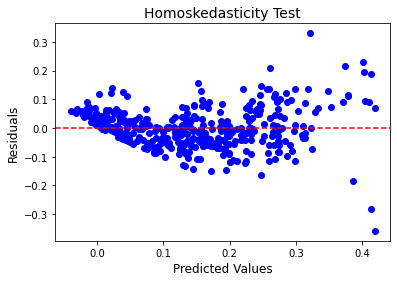

In [ ]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 12)
ax.set_ylabel('Residuals', fontsize = 12)
ax.set_title('Homoskedasticity Test', fontsize = 14)
plt.show()

In [ ]:
# # This block is not working yet in Python

# # 3A.2 White-Test
# from statsmodels.stats.diagnostic import het_white, het_breuschpagan
# pooled_OLS_dataset = pd.concat([dataset, residuals_pooled_OLS], axis=1)
# #dataset
# #residuals_pooled_OLS
# #pooled_OLS_dataset
# #pooled_OLS_dataset = pooled_OLS_dataset.drop(['Year'], axis = 1).fillna(0)
# exog = sm.tools.tools.add_constant(dataset[['DDD_sys_commun',
#                       'per_cap_US.',	'GDP_total','GDP_._health','Out_pocket_exp','HDR',
#                       'ctrl_corrup','GOV_effect','rule_law']])
# white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
# labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
# print(dict(zip(labels, white_test_results)))

AssertionError: ignored

In [ ]:
# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 105.7623372944989, 'LM p-val': 1.069182297404914e-18, 'F-Stat': 15.563007594626376, 'F p-val': 9.344765570818688e-22}


In [ ]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

1.0452622332509522


In [ ]:
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects
#exog = sm.tools.tools.add_constant(dataset['income'])
#endog = dataset['violent']
# random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
#print results
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:           multi_R_perc   R-squared:                        0.2742
Estimator:              RandomEffects   R-squared (Between):              0.8128
No. Observations:                 401   R-squared (Within):               0.0435
Date:                Mon, Mar 29 2021   R-squared (Overall):              0.6591
Time:                        22:17:05   Log-likelihood                    566.90
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      16.416
Entities:                          30   P-value                           0.0000
Avg Obs:                       13.367   Distribution:                   F(9,391)
Min Obs:                       8.0000                                           
Max Obs:                       14.000   F-statistic (robust):             15.945
                            

In [ ]:
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:           multi_R_perc   R-squared:                        0.0981
Estimator:                   PanelOLS   R-squared (Between):              0.1816
No. Observations:                 401   R-squared (Within):               0.0981
Date:                Mon, Mar 29 2021   R-squared (Overall):              0.1712
Time:                        22:17:24   Log-likelihood                    594.14
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.3756
Entities:                          30   P-value                           0.0000
Avg Obs:                       13.367   Distribution:                   F(9,362)
Min Obs:                       8.0000                                           
Max Obs:                       14.000   F-statistic (robust):             4.3756
                            

In [ ]:
import numpy.linalg as la
from scipy import stats
import numpy as np

In [ ]:
def hausman(fe, re):
 b = fe.params
 B = re.params
 v_b = fe.cov
 v_B = re.cov
 df = b[np.abs(b) < 1e8].size
 chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
 
 pval = stats.chi2.sf(chi2, df)
 return chi2, df, pval

In [ ]:
hausman_results = hausman(fe_res, re_res) 
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

chi-Squared: 34.71874062041656
degrees of freedom: 10
p-Value: 0.00013944048852665422


In [ ]:
import econtools
import econtools.metrics as mt

In [ ]:
def hausman(fe, re):
    """
    Compute hausman test for fixed effects/random effects models
    b = beta_fe
    B = beta_re
    From theory we have that b is always consistent, but B is consistent
    under the alternative hypothesis and efficient under the null.
    The test statistic is computed as
    z = (b - B)' [V_b - v_B^{-1}](b - B)
    The statistic is distributed z \sim \chi^2(k), where k is the number
    of regressors in the model.
    Parameters
    ==========
    fe : statsmodels.regression.linear_panel.PanelLMWithinResults
        The results obtained by using sm.PanelLM with the
        method='within' option.
    re : statsmodels.regression.linear_panel.PanelLMRandomResults
        The results obtained by using sm.PanelLM with the
        method='swar' option.
    Returns
    =======
    chi2 : float
        The test statistic
    df : int
        The number of degrees of freedom for the distribution of the
        test statistic
    pval : float
        The p-value associated with the null hypothesis
    Notes
    =====
    The null hypothesis supports the claim that the random effects
    estimator is "better". If we reject this hypothesis it is the same
    as saying we should be using fixed effects because there are
    systematic differences in the coefficients.
    """

    # Pull data out
    b = fe.params
    B = re.params
    v_b = fe.cov_params()
    v_B = re.cov_params()

    # NOTE: find df. fe should toss time-invariant variables, but it
    #       doesn't. It does return garbage so we use that to filter
    df = b[np.abs(b) < 1e8].size

    # compute test statistic and associated p-value
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B))
    pval = stats.chi2.sf(chi2, df)

    return chi2, df, pval
